In [1]:
!pip install pyarrow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
X0=pd.read_parquet('X_t0.parquet')
X0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,1.593110e+09,0xa821dee44fe91e79535762a466f6a09fc6727891,1.592795e+09,1.593110e+09,315154.0,50,53,-3,0.280005,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44292,10336621,1.593110e+09,0xc25c5e0495287cc3a380703b2b665da5964d35ea,1.589820e+09,1.593110e+09,3290294.0,536,606,-70,5.723699,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44293,10336624,1.593110e+09,0xa0f75491720835b36edc92d06ddc468d201e9b73,1.568312e+09,1.593110e+09,24797983.0,393,423,-30,2.343277,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44294,10336627,1.593110e+09,0x07582f51171839586e42a46d4f68c70a5eb72f93,1.561659e+09,1.593110e+09,31451728.0,45,49,-4,0.331227,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1


In [3]:
y=pd.read_parquet('y_t0.parquet')
y

,target
0,1
1,1
2,1
3,0
4,0
...,...
44291,1
44292,1
44293,0
44294,0


# EDA

## numerico

In [4]:
columnas = X0.columns

X0.describe()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
count,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,...,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000
mean,9.343121e+06,1.579559e+09,1.550122e+09,1.579501e+09,2.943773e+07,999.369514,1360.256231,-360.886717,2.717345,0.002874,...,1.577302,-0.717461,5.533406,22.260178,34.435369,0.267880,-0.006844,0.993156,0.846758,0.970268
std,7.772108e+05,1.070282e+07,2.936277e+07,1.071609e+07,2.897753e+07,3065.153260,3936.526950,2167.545039,13.380028,0.008137,...,10.362093,0.064708,1.532826,9.163070,18.010626,8.010179,0.153774,0.153774,0.360225,0.169848
min,7.711117e+06,1.557197e+09,1.438270e+09,1.557197e+09,1.370000e+02,1.000000,0.000000,-68013.000000,0.000000,0.000000,...,-25.740436,-0.895911,3.089819,6.297847,5.413265,-29.248726,-0.545814,0.454186,0.000000,0.000000
25%,8.638256e+06,1.569687e+09,1.522918e+09,1.569553e+09,3.641601e+06,34.000000,52.000000,-198.000000,0.076647,0.000937,...,-6.681407,-0.736622,4.520733,15.789090,20.398524,-4.305614,-0.073433,0.926567,1.000000,1.000000
50%,9.470717e+06,1.581544e+09,1.558756e+09,1.581499e+09,1.900256e+07,134.000000,207.000000,-49.000000,0.349336,0.001550,...,4.145440,-0.736622,5.229391,19.489917,30.411080,0.303495,-0.011708,0.988292,1.000000,1.000000
75%,1.008743e+07,1.589770e+09,1.573658e+09,1.589671e+09,5.196818e+07,471.000000,678.000000,-8.000000,1.406124,0.002773,...,8.143114,-0.668565,6.303838,27.579281,43.521182,5.438241,0.072939,1.072939,1.000000,1.000000
max,1.033663e+07,1.593110e+09,1.593109e+09,1.593151e+09,1.540836e+08,98747.000000,71087.000000,97831.000000,506.170766,0.415178,...,24.356935,-0.565216,11.588088,56.729534,108.686030,19.424855,0.534402,1.534402,1.000000,1.000000


In [5]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 77 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   borrow_block_number                      44296 non-null  int64  
 1   borrow_timestamp                         44296 non-null  float64
 2   wallet_address                           44296 non-null  object 
 3   first_tx_timestamp                       44296 non-null  float64
 4   last_tx_timestamp                        44296 non-null  float64
 5   wallet_age                               44296 non-null  float64
 6   incoming_tx_count                        44296 non-null  int64  
 7   outgoing_tx_count                        44296 non-null  int64  
 8   net_incoming_tx_count                    44296 non-null  int64  
 9   total_gas_paid_eth                       44296 non-null  float64
 10  avg_gas_paid_per_tx_eth                  44296

## Heatmap 

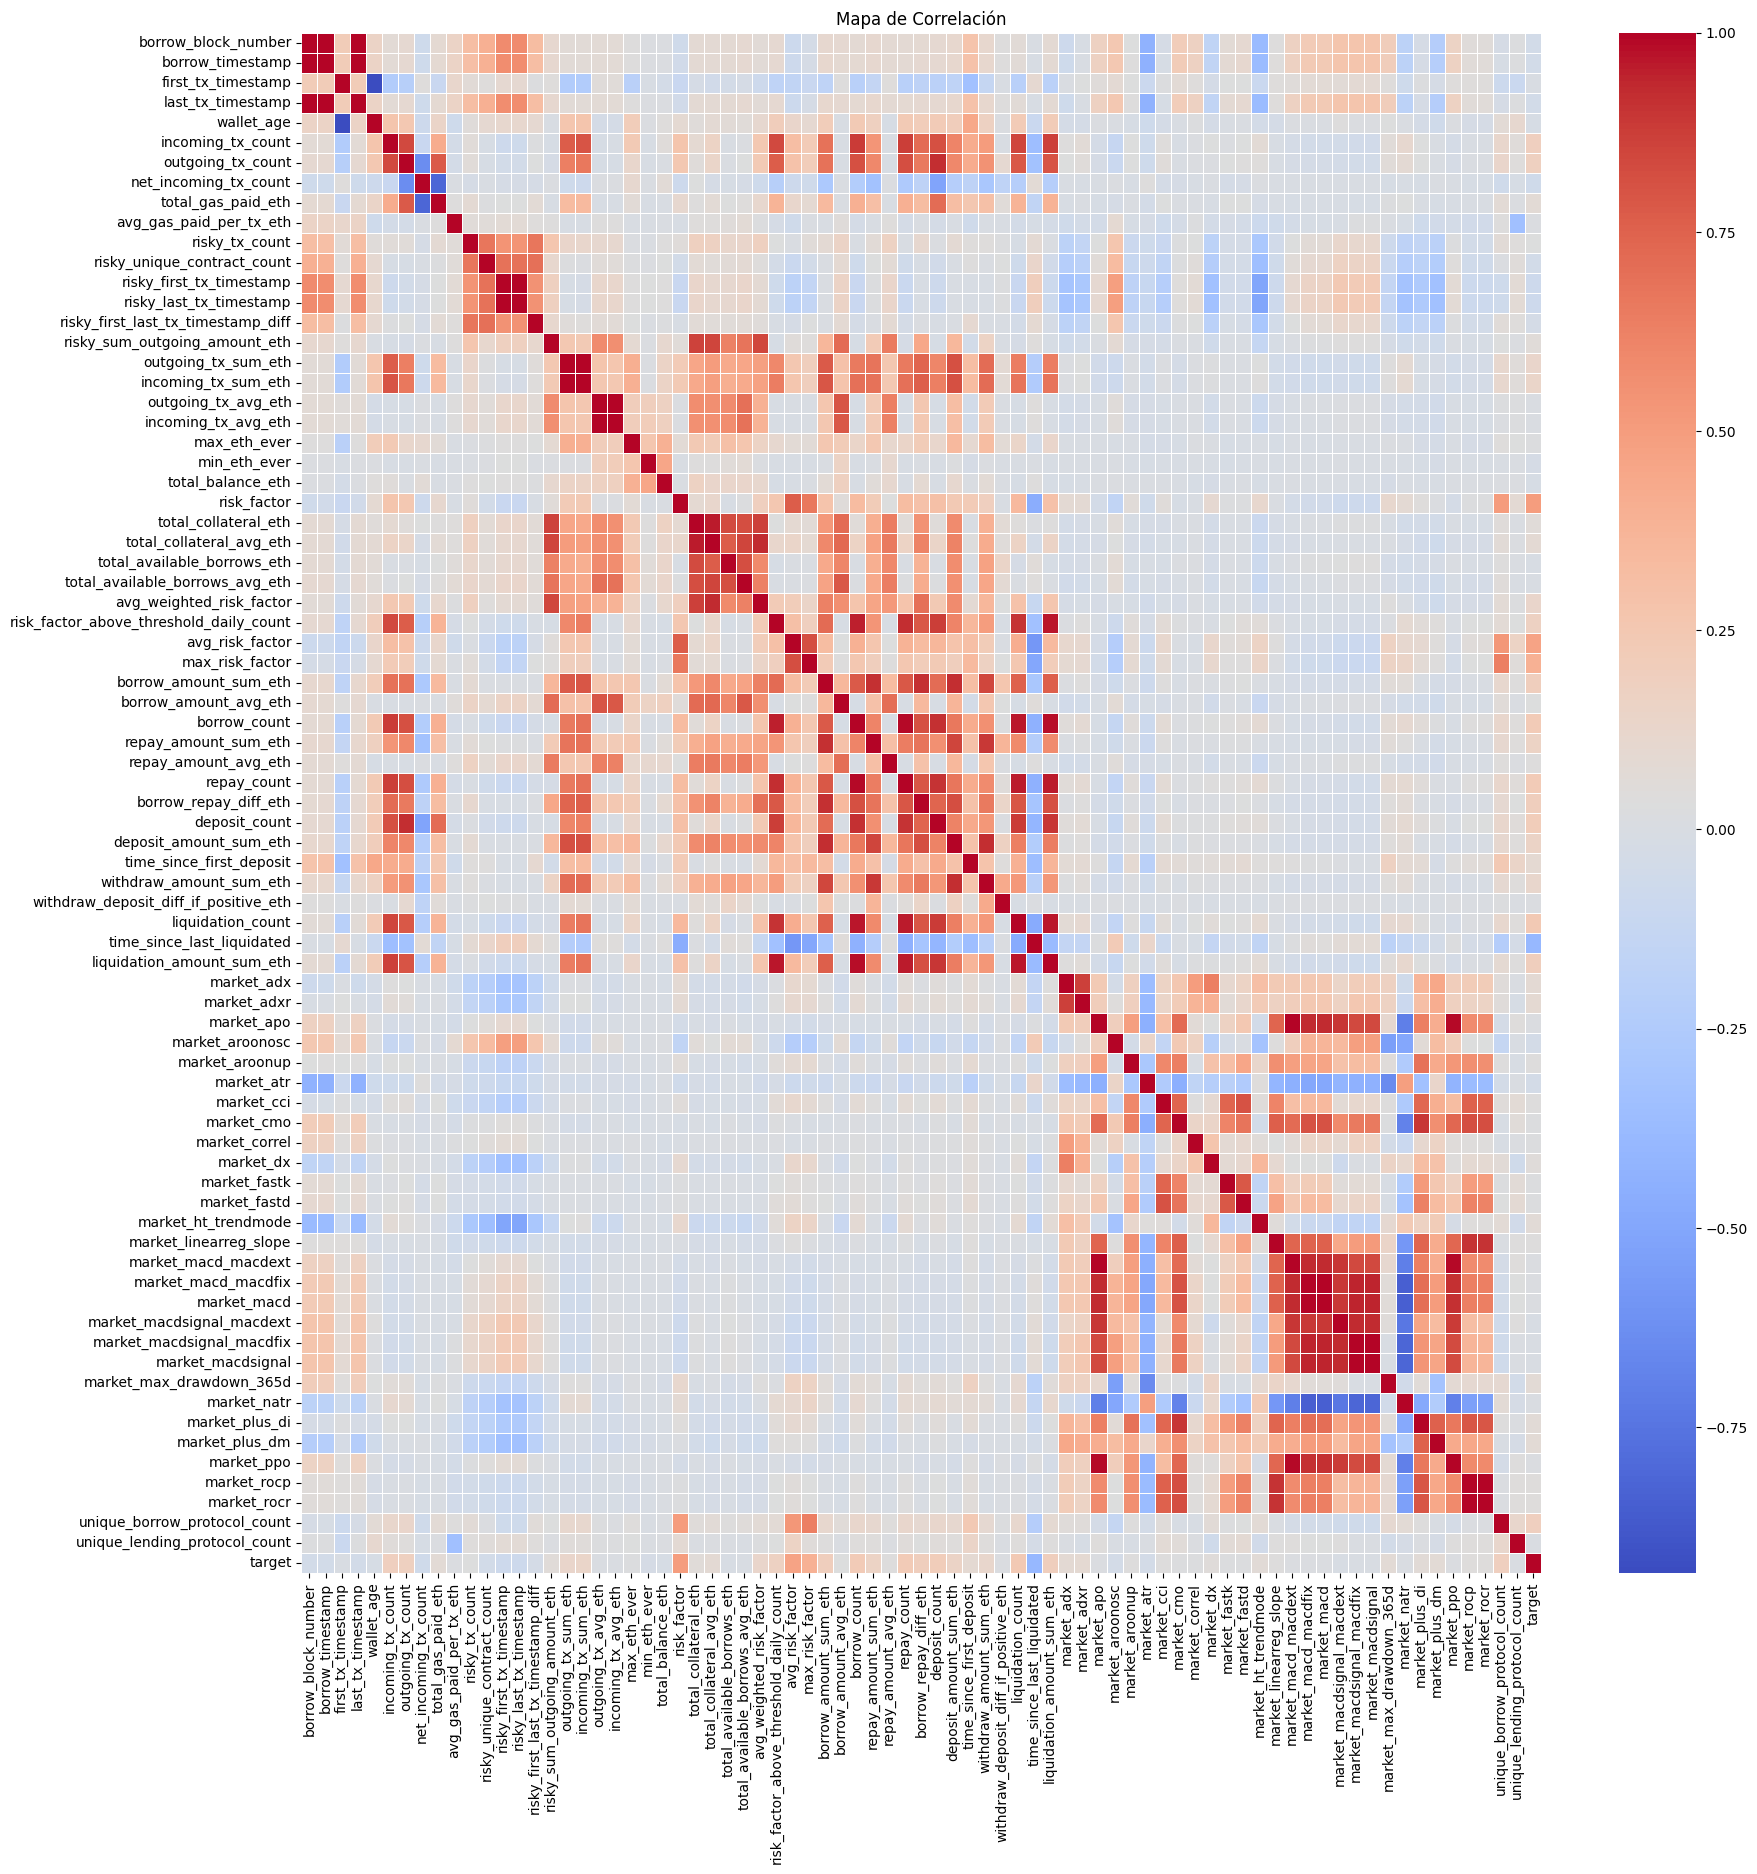

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.concat([X0, y], axis=1)
correlacion = df.select_dtypes(include=['float64', 'int64']).corr()


# Crear el heatmap
plt.figure(figsize=(20, 20))  # Tamaño del gráfico
sns.heatmap(correlacion,annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlación")
plt.show()

## Boxplots

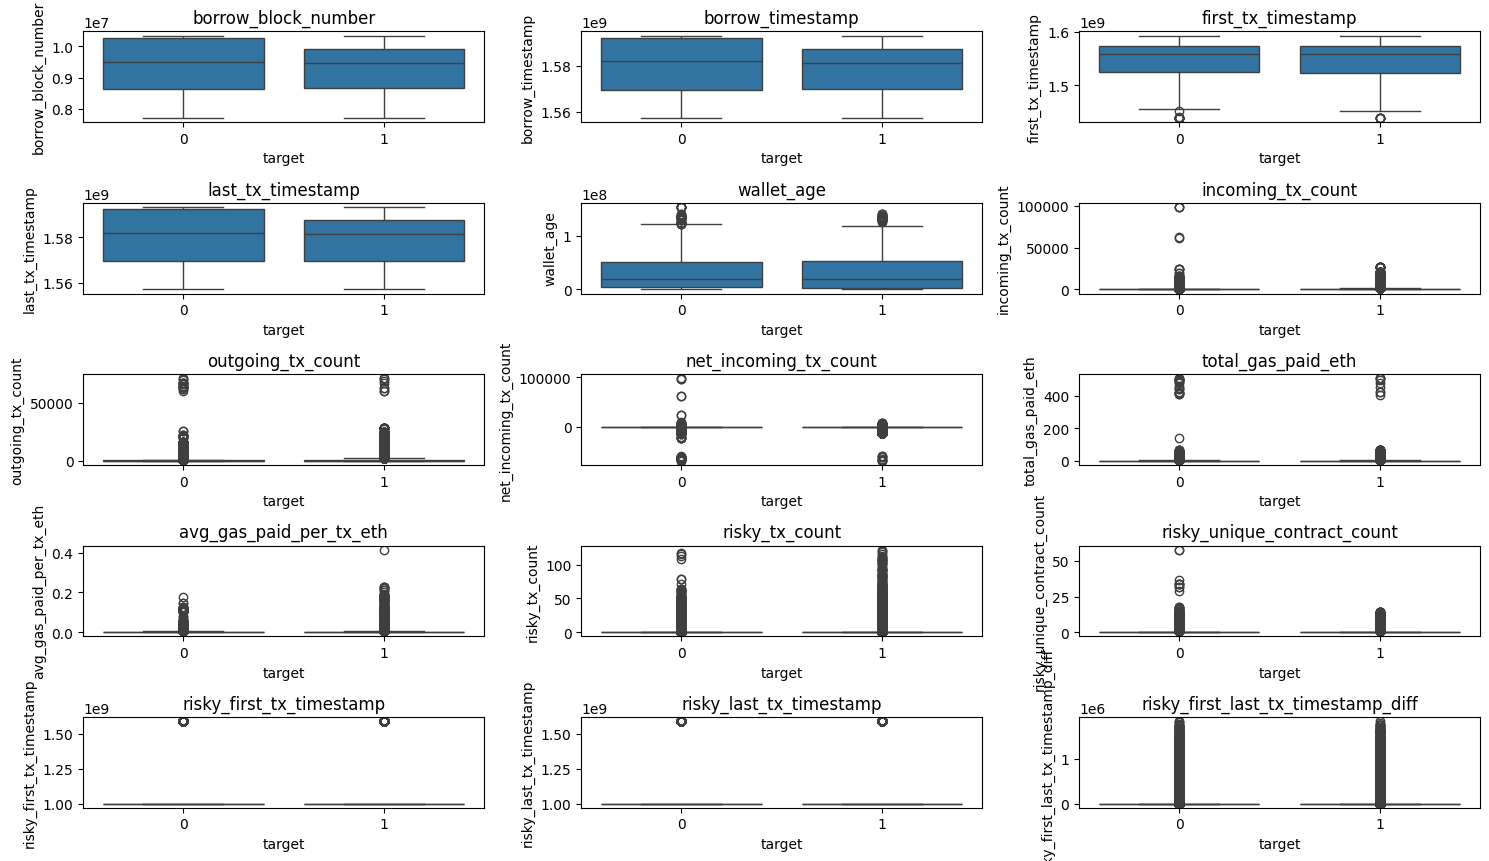

In [7]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[:15]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

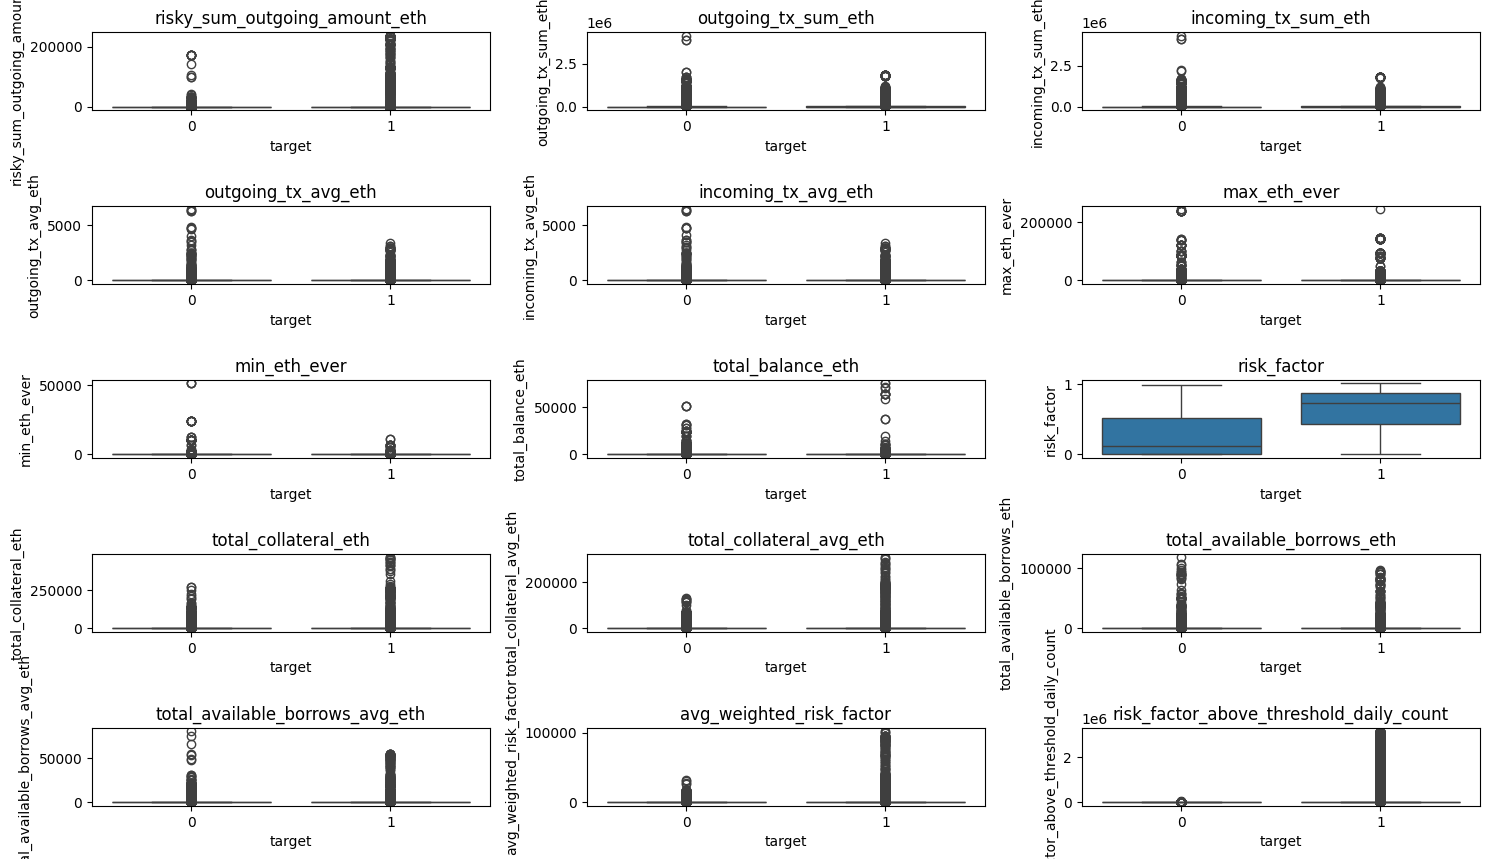

In [8]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[15:30]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

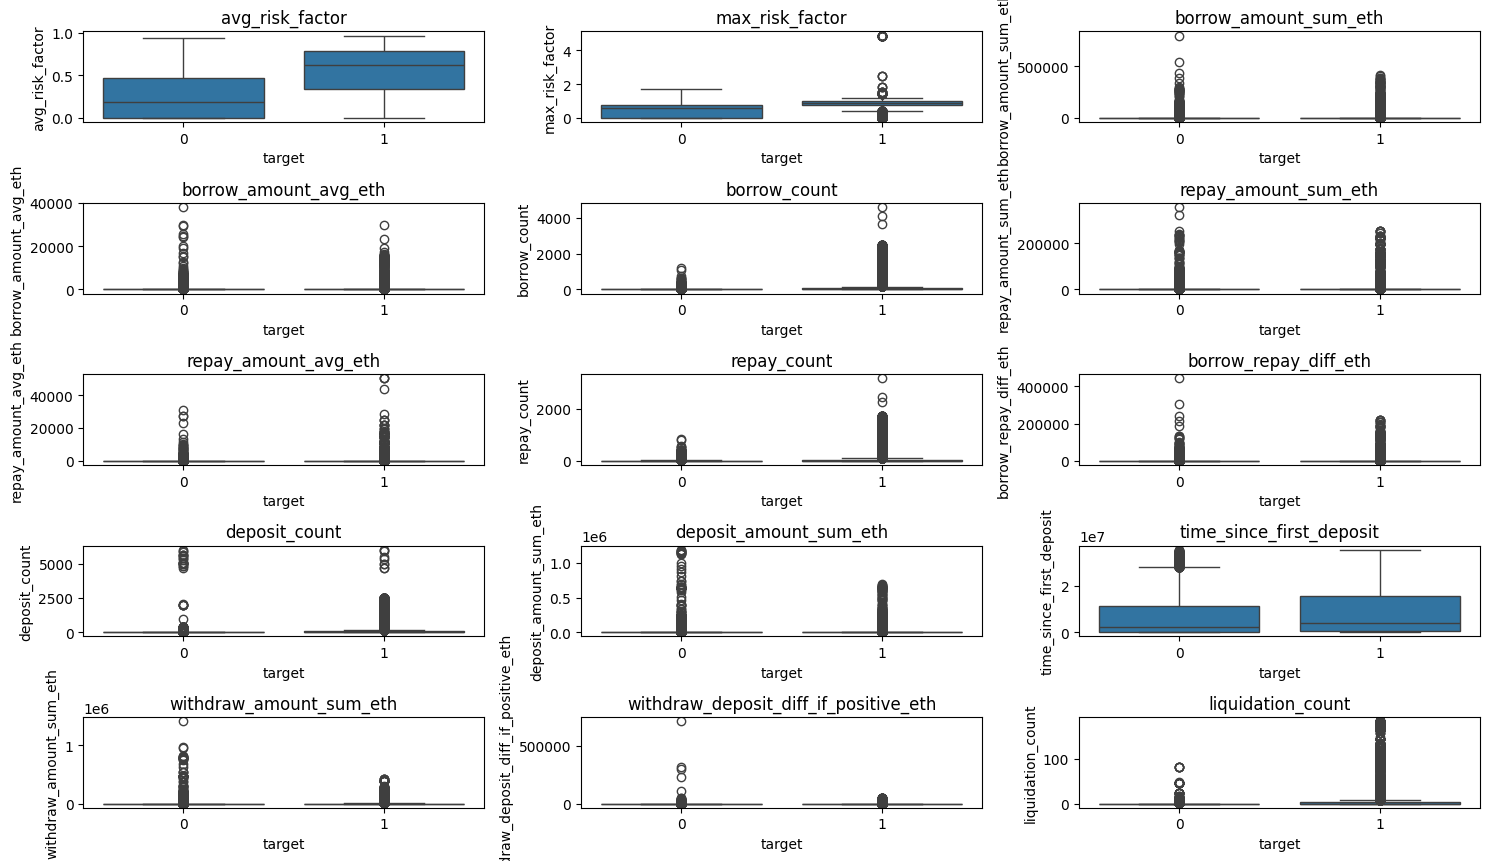

In [9]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[30:45]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

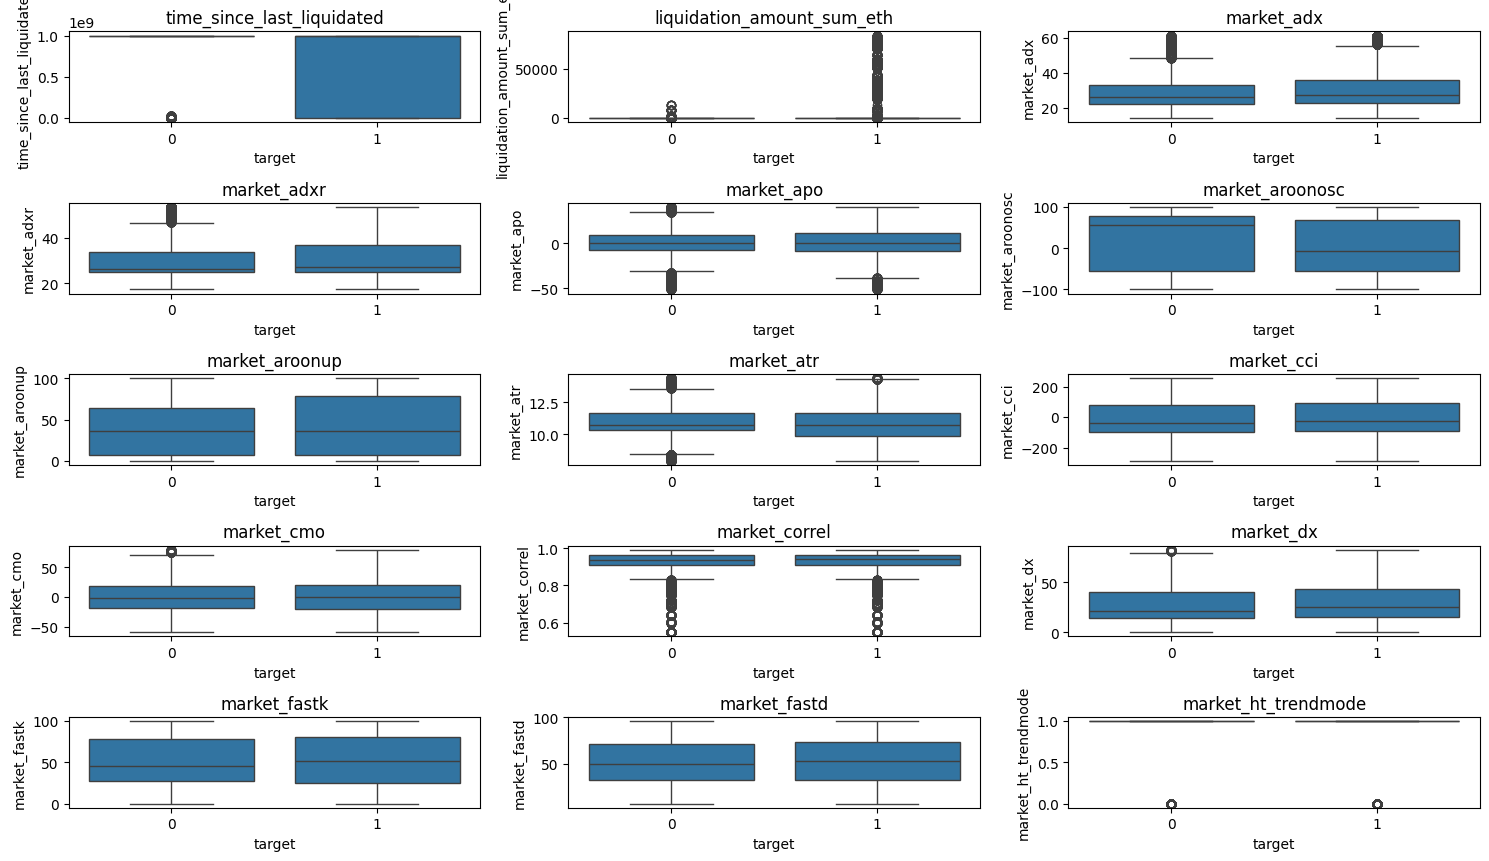

In [10]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[45:60]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

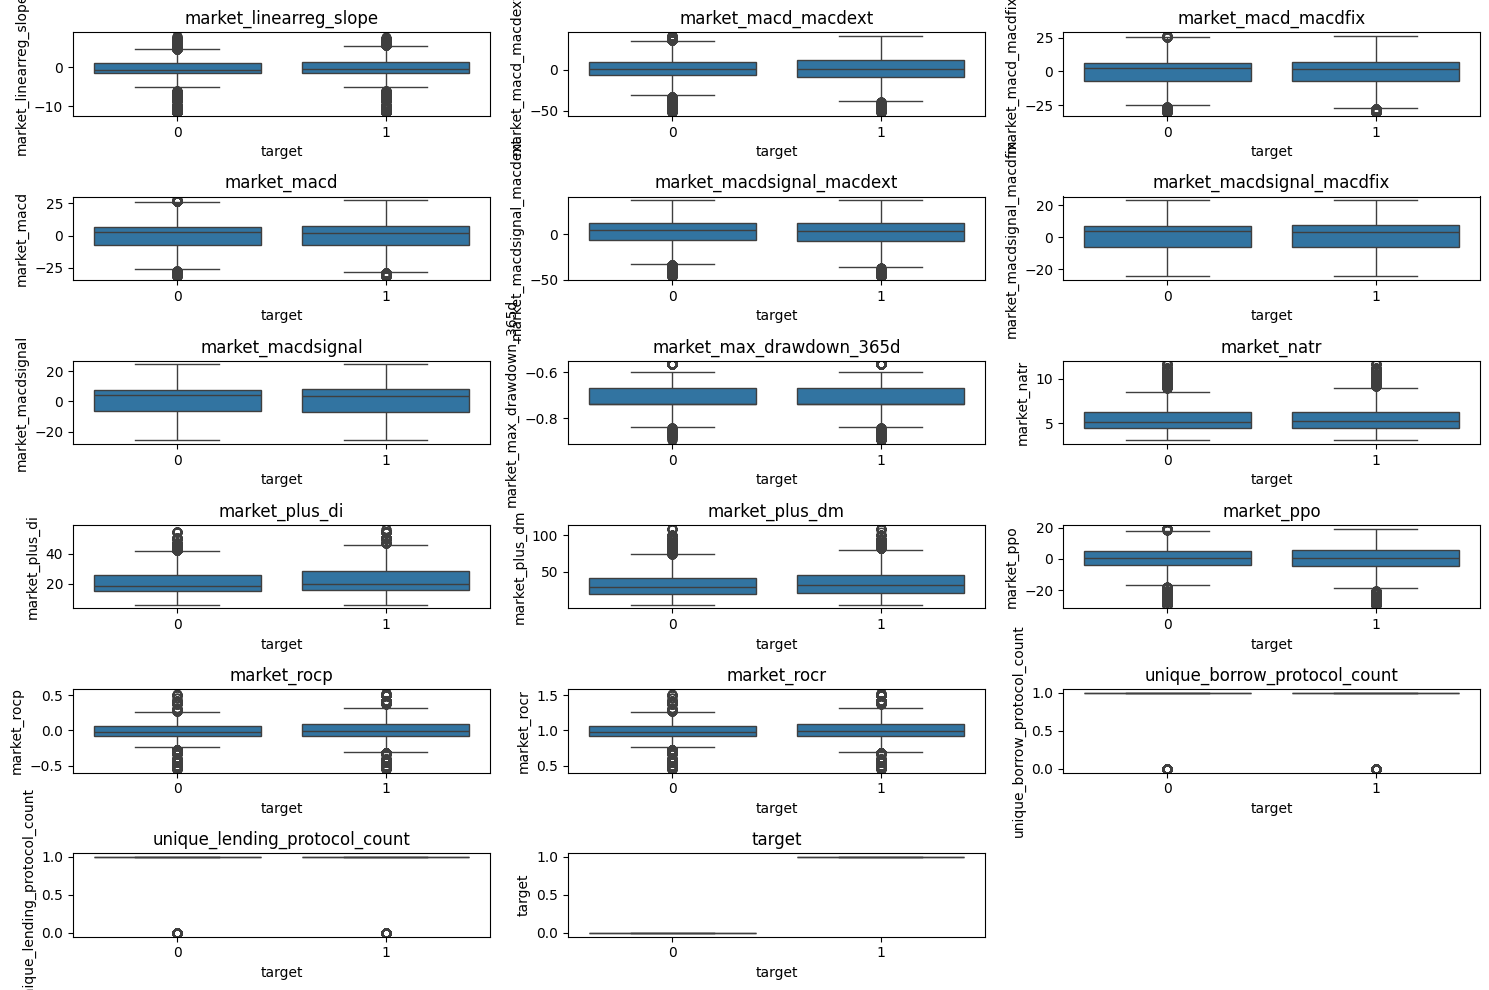

In [11]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[60:]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

## Histogramas

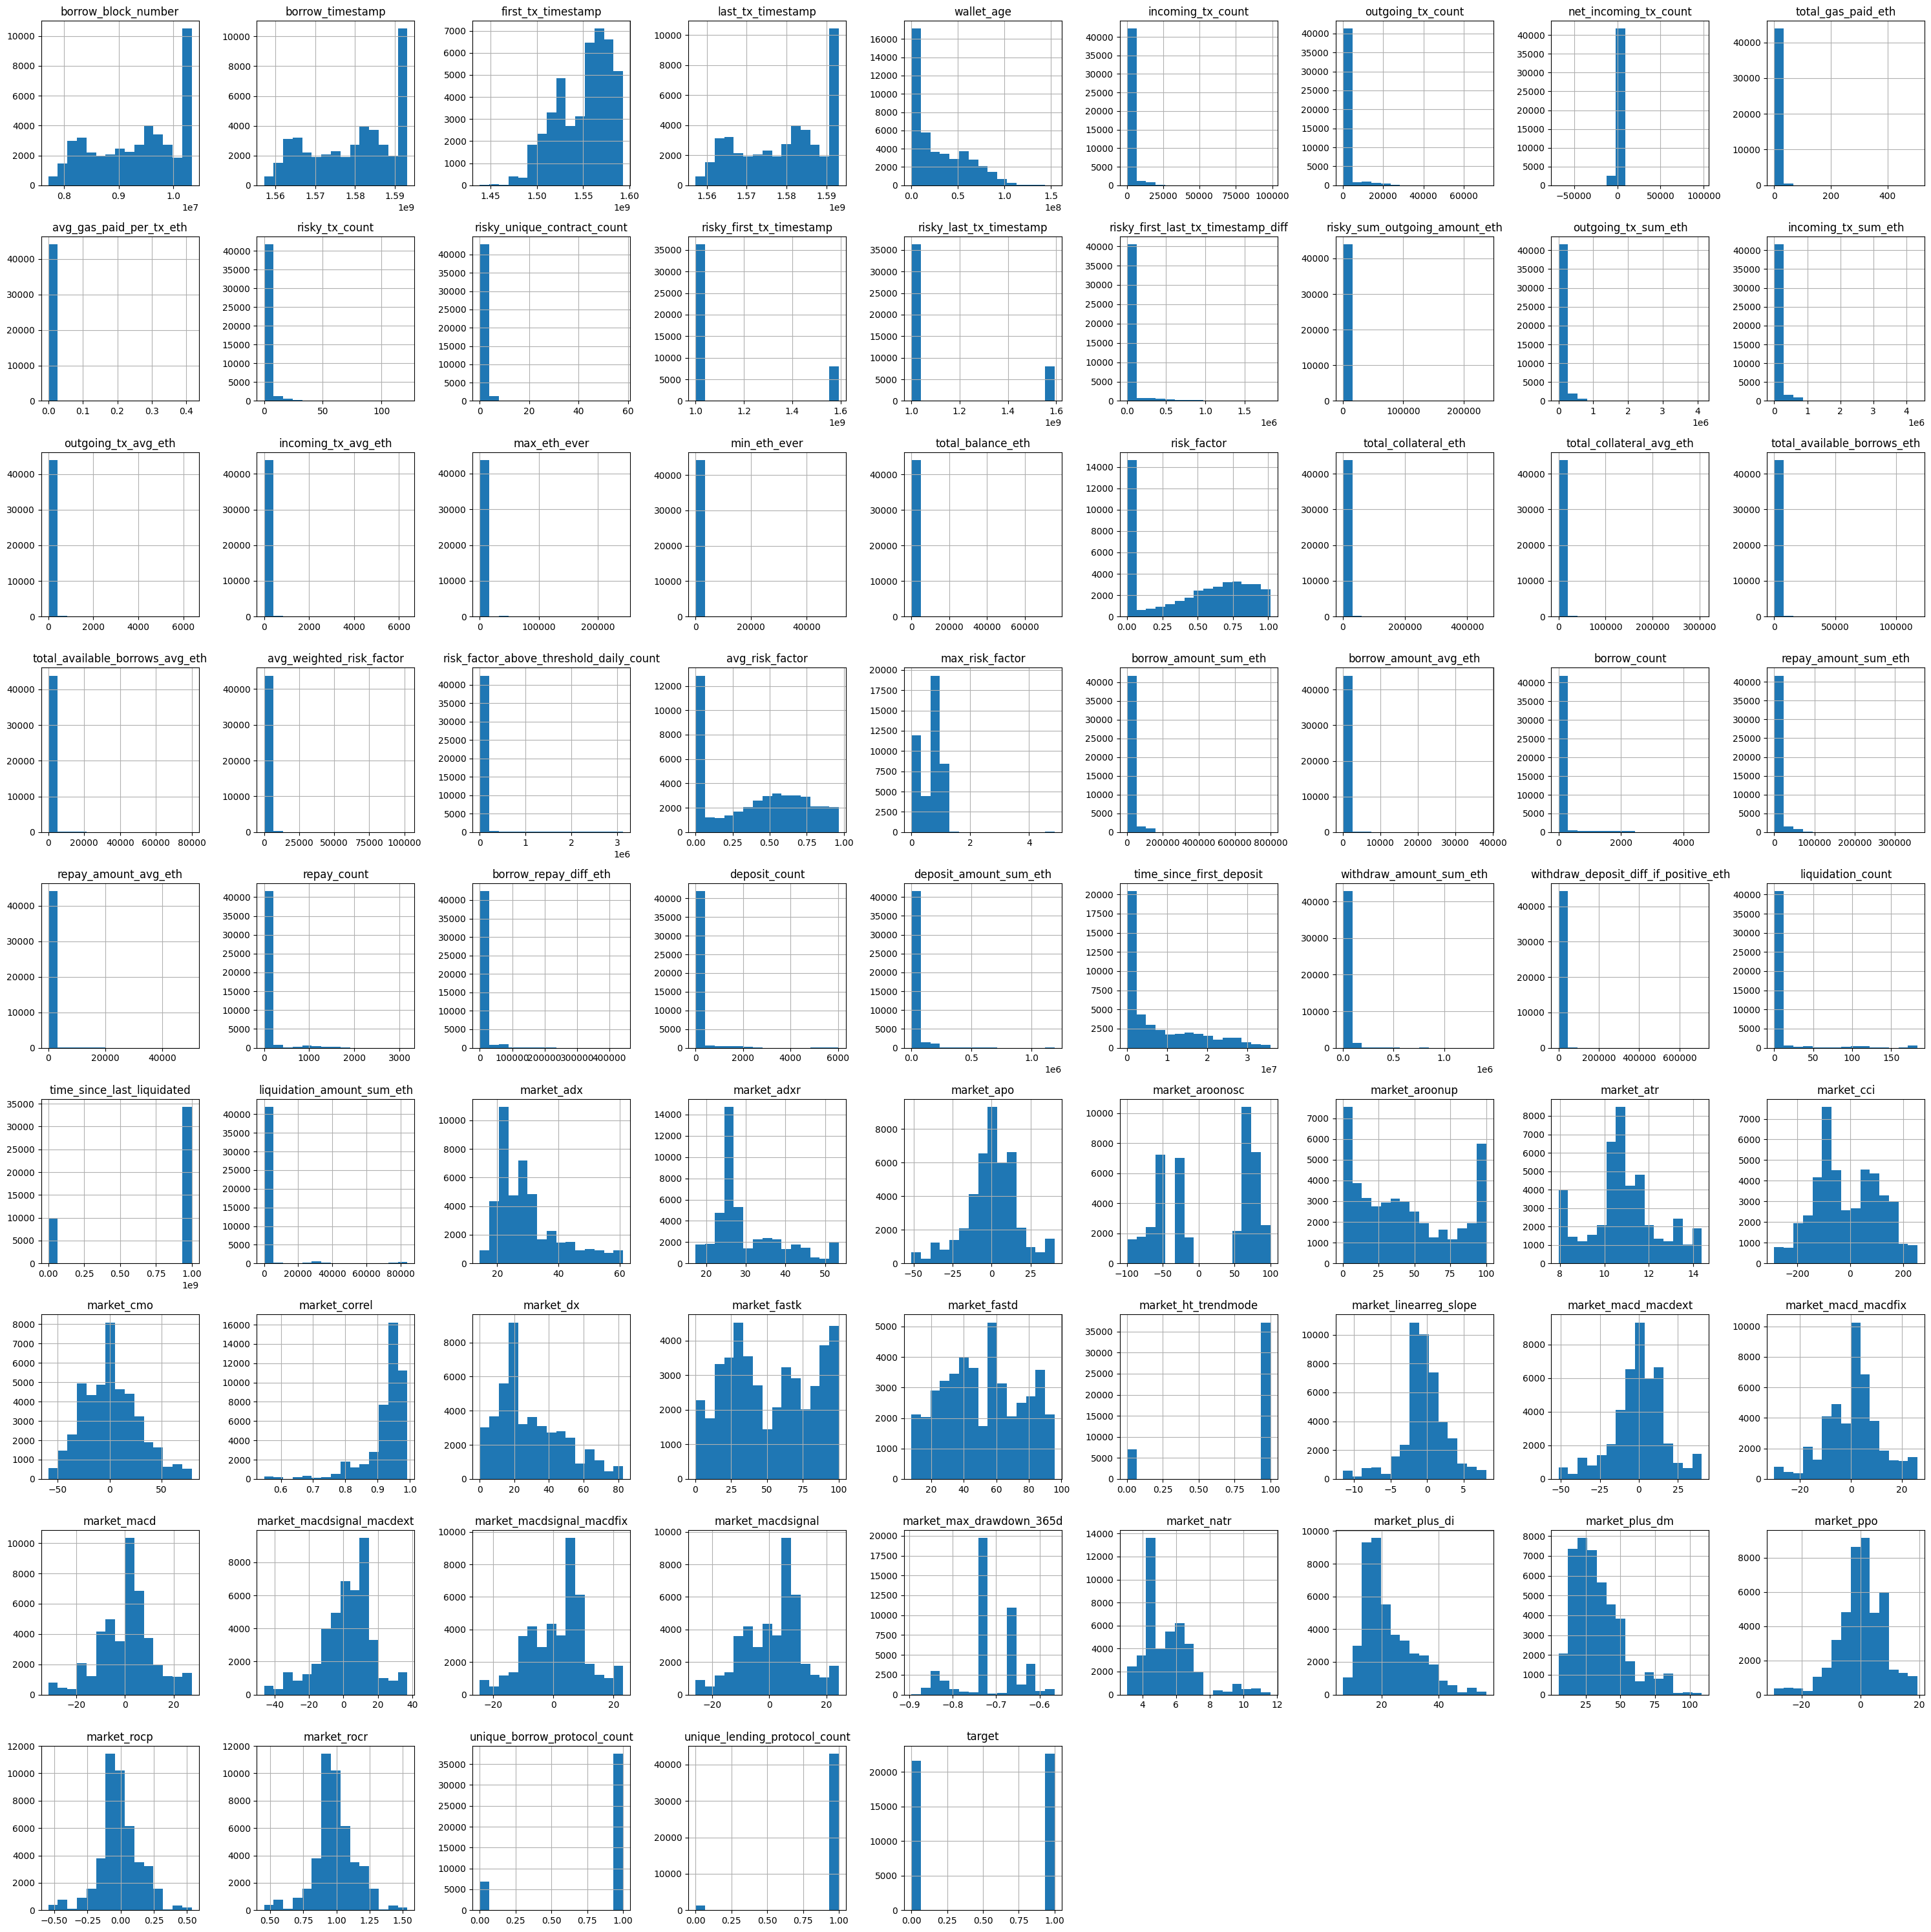

In [12]:
df.hist(bins=15, figsize=(30, 30))
plt.tight_layout()
plt.show()

# Feature engineering

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

ys = ['target']
binary_columns = ['market_ht_trendmode', 'unique_borrow_protocol_count', 'unique_lending_protocol_count']
id_columns =['borrow_block_number','risky_unique_contract_count','unique_borrow_protocol_count','unique_lending_protocol_count']
time_columns = ['risky_first_tx_timestamp','risky_last_tx_timestamp','risky_first_last_tx_timestamp_diff','time_since_first_deposit','time_since_last_liquidated']
timestamp_ms_columns = ['borrow_timestamp', 'first_tx_timestamp','last_tx_timestamp']
columns_to_scale = df.columns.difference(id_columns + binary_columns + timestamp_ms_columns + time_columns + ys)

def convert_timestamp_to_date(t):
    return pd.to_datetime(t , unit='s')

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),  
        #('timestamp', FunctionTransformer(convert_timestamp_to_date), timestamp_ms_columns),
        ('passthrough', 'passthrough', id_columns + binary_columns + time_columns+timestamp_ms_columns)  
    ]
)

In [14]:
#X0=X0.drop('wallet_address', axis=1)
X0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,1.593110e+09,0xa821dee44fe91e79535762a466f6a09fc6727891,1.592795e+09,1.593110e+09,315154.0,50,53,-3,0.280005,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44292,10336621,1.593110e+09,0xc25c5e0495287cc3a380703b2b665da5964d35ea,1.589820e+09,1.593110e+09,3290294.0,536,606,-70,5.723699,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44293,10336624,1.593110e+09,0xa0f75491720835b36edc92d06ddc468d201e9b73,1.568312e+09,1.593110e+09,24797983.0,393,423,-30,2.343277,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44294,10336627,1.593110e+09,0x07582f51171839586e42a46d4f68c70a5eb72f93,1.561659e+09,1.593110e+09,31451728.0,45,49,-4,0.331227,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1


Tal vez podriamos eliminar variables (son 77) pero no se si es legal xd

# Eliminar columnas correlacionadas

In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm  # Para la barra de progreso

def eliminar_correlacionadas(df, target_column, threshold=0.8):
    """
    Función para eliminar las columnas altamente correlacionadas de manera más eficiente.
    
    df: DataFrame con las columnas a analizar.
    target_column: El nombre de la columna objetivo (por ejemplo, 'Y_Ord').
    threshold: El umbral de correlación para considerar que dos variables están correlacionadas.
    
    Devuelve el DataFrame sin las columnas altamente correlacionadas.
    """
    # Comprobar si la columna objetivo existe en el DataFrame
    if target_column not in df.columns:
        raise ValueError(f"La columna objetivo '{target_column}' no existe en el DataFrame")
    
    # Copiar el DataFrame original para no modificar el original
    df_copy = df.copy()
    
    # Obtener las columnas numéricas, excluyendo la columna objetivo
    columnas_numericas = [col for col in df_copy.select_dtypes(include=np.number).columns if col != target_column]
    
    # Calcular la matriz de correlación solo una vez
    corr_matrix = df_copy[columnas_numericas].corr().abs()  # Correlaciones absolutas
    
    # Inicializar la lista de columnas a eliminar
    columnas_a_eliminar = set()  # Usamos un set para evitar duplicados
    
    # Usamos tqdm para la barra de progreso
    with tqdm(total=len(corr_matrix.columns) - 1, desc="Eliminando columnas correlacionadas", leave=True) as pbar:
        # Iterar sobre los pares de columnas correlacionadas
        for colname_1 in corr_matrix.columns:
            for colname_2 in corr_matrix.columns:
                # No comparar la columna consigo misma
                if colname_1 >= colname_2:
                    continue
                
                # Si la correlación es mayor al umbral, procesar
                if corr_matrix.loc[colname_1, colname_2] > threshold:
                    # Correlación con la columna objetivo
                    corr_with_y_1 = df_copy[colname_1].corr(df_copy[target_column])
                    corr_with_y_2 = df_copy[colname_2].corr(df_copy[target_column])
                    
                    # Eliminar la columna con menor correlación con la variable objetivo
                    if abs(corr_with_y_1) < abs(corr_with_y_2):
                        columnas_a_eliminar.add(colname_1)
                    else:
                        columnas_a_eliminar.add(colname_2)
            
            # Actualizar el progreso de la barra
            pbar.update(1)

    # Eliminar las columnas seleccionadas
    df_copy = df_copy.drop(columns=list(columnas_a_eliminar))
    
    # Retornar el DataFrame sin las columnas altamente correlacionadas
    return df_copy, list(columnas_a_eliminar)

In [29]:
data = pd.concat([X0, y], axis=1)

In [30]:
df_reducido, columnas_eliminadas = eliminar_correlacionadas(data, 'target', threshold=0.85)
print(f"Columnas eliminadas: {len(columnas_eliminadas)}", columnas_eliminadas)
df_reducido

Eliminando columnas correlacionadas: 76it [00:00, 397.52it/s]                        

Columnas eliminadas: 31 ['total_collateral_avg_eth', 'market_macdsignal_macdfix', 'repay_amount_sum_eth', 'incoming_tx_count', 'risky_sum_outgoing_amount_eth', 'market_rocp', 'borrow_amount_sum_eth', 'borrow_timestamp', 'market_cmo', 'outgoing_tx_count', 'deposit_amount_sum_eth', 'market_macdsignal', 'first_tx_timestamp', 'market_macd_macdfix', 'market_macd', 'borrow_count', 'withdraw_amount_sum_eth', 'market_macdsignal_macdext', 'deposit_count', 'market_linearreg_slope', 'liquidation_amount_sum_eth', 'repay_count', 'total_collateral_eth', 'incoming_tx_avg_eth', 'market_adx', 'market_ppo', 'risky_last_tx_timestamp', 'last_tx_timestamp', 'outgoing_tx_sum_eth', 'market_macd_macdext', 'risk_factor_above_threshold_daily_count']


,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,market_fastd,market_ht_trendmode,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973049.0,-239,0.397391,0.000981,0,0,999999999,0,...,57.459322,1,-0.895911,4.479356,33.216622,33.415526,1.104294,0,1,1
1,7711123,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973188.0,-239,0.399063,0.000983,0,0,999999999,0,...,57.459322,1,-0.895911,4.479356,33.216622,33.415526,1.104294,1,1,1
2,7711126,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973238.0,-239,0.400895,0.000985,0,0,999999999,0,...,57.459322,1,-0.895911,4.479356,33.216622,33.415526,1.104294,1,1,1
3,7711672,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,13922.0,-48,0.604001,0.010786,0,0,999999999,0,...,57.459322,1,-0.895911,4.479356,33.216622,33.415526,1.104294,0,1,0
4,7712572,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,264.0,-1,0.003008,0.001003,0,0,999999999,0,...,57.459322,1,-0.895911,4.479356,33.216622,33.415526,1.104294,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,0xa821dee44fe91e79535762a466f6a09fc6727891,315154.0,-3,0.280005,0.005283,14,1,1592795477,314333,...,76.847924,0,-0.736622,4.385686,19.552328,24.502158,1.007081,1,1,1
44292,10336621,0xc25c5e0495287cc3a380703b2b665da5964d35ea,3290294.0,-70,5.723699,0.009445,61,4,1592031665,993282,...,76.847924,0,-0.736622,4.385686,19.552328,24.502158,1.007081,1,1,1
44293,10336624,0xa0f75491720835b36edc92d06ddc468d201e9b73,24797983.0,-30,2.343277,0.005540,32,9,1592346991,762875,...,76.847924,0,-0.736622,4.385686,19.552328,24.502158,1.007081,1,1,0
44294,10336627,0x07582f51171839586e42a46d4f68c70a5eb72f93,31451728.0,-4,0.331227,0.006901,3,3,1592961971,79695,...,76.847924,0,-0.736622,4.385686,19.552328,24.502158,1.007081,1,1,0


# Agregar historia en cadena

In [57]:
cols_historia = ['borrow_block_number',
 'wallet_age',
 'net_incoming_tx_count',
 'total_gas_paid_eth',
 'avg_gas_paid_per_tx_eth',
 'risky_tx_count',
 'risky_unique_contract_count',
 'risky_first_tx_timestamp',
 'risky_first_last_tx_timestamp_diff',
 'incoming_tx_sum_eth',
 'outgoing_tx_avg_eth',
 'max_eth_ever',
 'min_eth_ever',
 'total_balance_eth',
 'risk_factor',
 'total_available_borrows_eth',
 'total_available_borrows_avg_eth',
 'avg_weighted_risk_factor',
 'avg_risk_factor',
 'max_risk_factor',
 'borrow_amount_avg_eth',
 'repay_amount_avg_eth',
 'borrow_repay_diff_eth',
 'time_since_first_deposit',
 'withdraw_deposit_diff_if_positive_eth',
 'liquidation_count',
 'time_since_last_liquidated',
 'market_adxr',
 'market_apo',
 'market_aroonosc',
 'market_aroonup',
 'market_atr',
 'market_cci',
 'market_correl',
 'market_dx',
 'market_fastk',
 'market_fastd',
 'market_ht_trendmode',
 'market_max_drawdown_365d',
 'market_natr',
 'market_plus_di',
 'market_plus_dm',
 'market_rocr',
 'unique_borrow_protocol_count',
 'unique_lending_protocol_count']

In [63]:
import pandas as pd

def generar_columnas_historia_optimizada_con_progreso(df, columnas, max_periodos=3):
    """
    Crea nuevas columnas basadas en shifts, medias móviles, desviaciones estándar y variación porcentual
    para las columnas especificadas en el DataFrame. Los valores ausentes se completan con el valor más
    cercano disponible del mismo wallet_id. Se incluyen mensajes de progreso.

    Parámetros:
        df (pd.DataFrame): DataFrame original con los datos.
        columnas (list): Lista de nombres de las columnas para las que se deben generar nuevas columnas.
        max_periodos (int): Número máximo de periodos para generar las nuevas columnas.

    Retorna:
        pd.DataFrame: Nuevo DataFrame con las columnas originales y las nuevas columnas generadas.
    """
    # Hacemos una copia del DataFrame original
    df_nuevo = df.copy()
    
    # Crear un DataFrame para almacenar nuevas columnas y evitar concatenaciones costosas
    nuevas_columnas = pd.DataFrame(index=df.index)
    
    # Total de cálculos a realizar (número de columnas * 4 cálculos * max_periodos)
    total_calculos = len(columnas) * 4 * max_periodos
    calculos_realizados = 0

    for col in columnas:
        print(f"Procesando columna: {col}")
        
        # Ordenar el DataFrame por 'wallet_address' para procesar en bloques ordenados
        df = df.sort_values(['wallet_address']).reset_index(drop=True)
        
        # Shift y cálculos dentro de los grupos
        for i in range(1, max_periodos + 1):
            # Shift
            shift_col = df.groupby('wallet_address')[col].shift(i).fillna(method='ffill').fillna(method='bfill')
            nuevas_columnas[f'{col}_shift_{i}'] = shift_col
            calculos_realizados += 1
            print(f"  {col} - Shift {i}: {calculos_realizados / total_calculos:.2%} completado")
            
            # Media móvil
            rolling_mean = df.groupby('wallet_address')[col].transform(
                lambda x: x.rolling(window=i+1, min_periods=1).mean()
            )
            nuevas_columnas[f'{col}_mm_{i}'] = rolling_mean
            calculos_realizados += 1
            print(f"  {col} - Media móvil {i}: {calculos_realizados / total_calculos:.2%} completado")
            
            # Desviación estándar
            rolling_std = df.groupby('wallet_address')[col].transform(
                lambda x: x.rolling(window=i+1, min_periods=1).std()
            ).fillna(0)
            nuevas_columnas[f'{col}_desv_{i}'] = rolling_std
            calculos_realizados += 1
            print(f"  {col} - Desviación estándar {i}: {calculos_realizados / total_calculos:.2%} completado")
            
            # Variación porcentual
            variacion_col = ((df[col] - shift_col) / shift_col * 100).fillna(0)
            nuevas_columnas[f'{col}_variacion_{i}'] = variacion_col
            calculos_realizados += 1
            print(f"  {col} - Variación porcentual {i}: {calculos_realizados / total_calculos:.2%} completado")
    
    print("Todos los cálculos completados. Combinando resultados...")
    # Combinar el DataFrame original con las nuevas columnas
    df_nuevo = pd.concat([df_nuevo, nuevas_columnas], axis=1)
    print("Proceso finalizado.")

    return df_nuevo


In [64]:
resultados = generar_columnas_historia_optimizada_con_progreso(df_reducido, columnas=cols_historia, max_periodos=3)
resultados

Procesando columna: borrow_block_number
  borrow_block_number - Shift 1: 0.19% completado
  borrow_block_number - Media móvil 1: 0.37% completado
  borrow_block_number - Desviación estándar 1: 0.56% completado
  borrow_block_number - Variación porcentual 1: 0.74% completado
  borrow_block_number - Shift 2: 0.93% completado
  borrow_block_number - Media móvil 2: 1.11% completado
  borrow_block_number - Desviación estándar 2: 1.30% completado
  borrow_block_number - Variación porcentual 2: 1.48% completado
  borrow_block_number - Shift 3: 1.67% completado
  borrow_block_number - Media móvil 3: 1.85% completado
  borrow_block_number - Desviación estándar 3: 2.04% completado
  borrow_block_number - Variación porcentual 3: 2.22% completado
Procesando columna: wallet_age
  wallet_age - Shift 1: 2.41% completado
  wallet_age - Media móvil 1: 2.59% completado
  wallet_age - Desviación estándar 1: 2.78% completado
  wallet_age - Variación porcentual 1: 2.96% completado
  wallet_age - Shift 2: 3

,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,unique_lending_protocol_count_desv_1,unique_lending_protocol_count_variacion_1,unique_lending_protocol_count_shift_2,unique_lending_protocol_count_mm_2,unique_lending_protocol_count_desv_2,unique_lending_protocol_count_variacion_2,unique_lending_protocol_count_shift_3,unique_lending_protocol_count_mm_3,unique_lending_protocol_count_desv_3,unique_lending_protocol_count_variacion_3
0,7711117,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973049.0,-239,0.397391,0.000981,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,7711123,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973188.0,-239,0.399063,0.000983,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7711126,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973238.0,-239,0.400895,0.000985,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,7711672,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,13922.0,-48,0.604001,0.010786,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,7712572,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,264.0,-1,0.003008,0.001003,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,0xa821dee44fe91e79535762a466f6a09fc6727891,315154.0,-3,0.280005,0.005283,14,1,1592795477,314333,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44292,10336621,0xc25c5e0495287cc3a380703b2b665da5964d35ea,3290294.0,-70,5.723699,0.009445,61,4,1592031665,993282,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44293,10336624,0xa0f75491720835b36edc92d06ddc468d201e9b73,24797983.0,-30,2.343277,0.005540,32,9,1592346991,762875,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44294,10336627,0x07582f51171839586e42a46d4f68c70a5eb72f93,31451728.0,-4,0.331227,0.006901,3,3,1592961971,79695,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_reducido2, columnas_eliminadas2 = eliminar_correlacionadas(resultados, 'target', threshold=0.85)
print(f"Columnas eliminadas: {len(columnas_eliminadas2)}", columnas_eliminadas2)
df_reducido2

# Entrenar preliminarmente con Pycaret

In [91]:
from sklearn.model_selection import train_test_split

data = pd.concat([X0, y], axis=1)

#X_train, X_val = train_test_split(data, test_size=0.3, random_state=123, stratify=data['target'])
X_train, X_val = train_test_split(data, test_size=0.3, random_state=123, stratify=data['target'])

print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}")

Entrenamiento: (31007, 78), Validación: (13289, 78)


In [16]:
from pycaret.classification import predict_model, finalize_model, get_config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def validacion_modelo(best_model, data_val, target_column='target'):
    """
    Evalúa el modelo `best_model` de PyCaret usando un conjunto de validación `data_val`.
    Calcula el reporte de clasificación y la matriz de confusión, y visualiza los resultados
    para el `best_model` y el `finalized_model`.
    
    Parameters:
    - best_model: El mejor modelo entrenado de PyCaret.
    - data_val: El conjunto de datos de validación con la columna objetivo.
    - target_column: El nombre de la columna objetivo (predicción), por defecto es 'previo_fallo'.
    """
    
    # Finalizar el modelo (esto incluye las transformaciones necesarias)
    #finalized_model = finalize_model(best_model)
    
    # Realizar predicciones usando el modelo finalizado (este paso también incluye preprocesamiento)
    validation_results_finalized = predict_model(best_model, data=data_val)
    
    # Obtener las etiquetas verdaderas y predichas
    y_true = data_val[target_column]
    y_pred_finalized = validation_results_finalized['prediction_label']
    
    # Reporte de clasificación para el finalized_model
    print("\nReporte de Clasificación para el Finalized Model:")
    print(classification_report(y_true, y_pred_finalized))
    
    # Matriz de confusión para el finalized_model
    conf_matrix_finalized = confusion_matrix(y_true, y_pred_finalized)

    # Visualización de la matriz de confusión para el finalized_model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix_finalized, annot=True, fmt='d', cmap="Blues", xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.title("Matriz de Confusión - Finalized Model")
    plt.xlabel('Predicciones')
    plt.ylabel('Verdaderos')
    plt.tight_layout()
    plt.show()

In [72]:
import pandas as pd
import numpy as np

def contar_nans_infinitos(df):
    """
    Identifica las columnas con al menos un valor NaN o infinito,
    y cuenta cuántos de estos valores tiene cada columna.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar.

    Retorna:
        pd.DataFrame: DataFrame con las columnas problemáticas y los conteos de NaNs e infinitos.
    """
    # Filtrar solo columnas numéricas para evitar errores con np.isinf
    columnas_numericas = df.select_dtypes(include=[np.number])

    # Filtrar columnas que tengan al menos un NaN o infinito
    columnas_con_problemas = columnas_numericas.columns[
        (columnas_numericas.isna().any() | np.isinf(columnas_numericas).any())
    ]

    # Crear un DataFrame para almacenar los resultados
    resultados = pd.DataFrame({
        'NaNs': columnas_numericas[columnas_con_problemas].isna().sum(),
        'Infinitos': columnas_numericas[columnas_con_problemas].apply(lambda x: np.isinf(x).sum())
    })

    # Filtrar columnas con al menos un NaN o infinito
    resultados = resultados[(resultados['NaNs'] > 0) | (resultados['Infinitos'] > 0)]
    return resultados

# Llamada a la función con el DataFrame 'resultados'
resumen_problemas = contar_nans_infinitos(resultados2)
print(resumen_problemas)

Empty DataFrame
Columns: [NaNs, Infinitos]
Index: []


In [71]:
resultados2 = resultados.replace([np.inf, -np.inf], 0)
resultados2

,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,unique_lending_protocol_count_desv_1,unique_lending_protocol_count_variacion_1,unique_lending_protocol_count_shift_2,unique_lending_protocol_count_mm_2,unique_lending_protocol_count_desv_2,unique_lending_protocol_count_variacion_2,unique_lending_protocol_count_shift_3,unique_lending_protocol_count_mm_3,unique_lending_protocol_count_desv_3,unique_lending_protocol_count_variacion_3
0,7711117,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973049.0,-239,0.397391,0.000981,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,7711123,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973188.0,-239,0.399063,0.000983,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7711126,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973238.0,-239,0.400895,0.000985,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,7711672,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,13922.0,-48,0.604001,0.010786,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,7712572,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,264.0,-1,0.003008,0.001003,0,0,999999999,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,0xa821dee44fe91e79535762a466f6a09fc6727891,315154.0,-3,0.280005,0.005283,14,1,1592795477,314333,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44292,10336621,0xc25c5e0495287cc3a380703b2b665da5964d35ea,3290294.0,-70,5.723699,0.009445,61,4,1592031665,993282,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44293,10336624,0xa0f75491720835b36edc92d06ddc468d201e9b73,24797983.0,-30,2.343277,0.005540,32,9,1592346991,762875,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
44294,10336627,0x07582f51171839586e42a46d4f68c70a5eb72f93,31451728.0,-4,0.331227,0.006901,3,3,1592961971,79695,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
import pandas as pd
import numpy as np

def generar_columnas_variacion_optimizada(df, columnas, max_periodos=3, valor_por_defecto=0):
    """
    Crea o reemplaza las columnas basadas en la variación porcentual para las columnas especificadas
    en el DataFrame. Maneja casos donde el denominador es 0 asignando un valor fijo.

    Parámetros:
        df (pd.DataFrame): DataFrame original con los datos.
        columnas (list): Lista de nombres de las columnas para las que se deben generar las columnas de variación.
        max_periodos (int): Número máximo de periodos para calcular la variación porcentual.
        valor_por_defecto (int o float): Valor a asignar cuando el denominador (shift_col) es 0.

    Retorna:
        pd.DataFrame: Nuevo DataFrame con las columnas originales y las nuevas columnas de variación.
    """
    # Hacemos una copia del DataFrame original para no modificarlo directamente
    df_nuevo = df.copy()
    
    # Crear un DataFrame para almacenar las nuevas columnas de variación
    nuevas_columnas = pd.DataFrame(index=df.index)
    
    # Total de cálculos a realizar
    total_calculos = len(columnas) * max_periodos
    calculos_realizados = 0

    for col in columnas:
        print(f"Procesando columna: {col}")
        
        # Ordenar el DataFrame por 'wallet_address' para procesar en bloques ordenados
        df = df.sort_values(['wallet_address']).reset_index(drop=True)
        
        for i in range(1, max_periodos + 1):
            # Shift
            shift_col = df.groupby('wallet_address')[col].shift(i)
            
            # Variación porcentual: Manejar casos donde shift_col es 0
            variacion_col = ((df[col] - shift_col) / shift_col.replace(0, np.nan) * 100)
            variacion_col = variacion_col.replace([np.inf, -np.inf, np.nan], valor_por_defecto)
            
            # Reemplazar las columnas existentes si ya existen
            nuevas_columnas[f'{col}_variacion_{i}'] = variacion_col
            
            calculos_realizados += 1
            print(f"  {col} - Variación porcentual {i}: {calculos_realizados / total_calculos:.2%} completado")
    
    print("Todos los cálculos completados. Combinando resultados...")
    # Combinar el DataFrame original con las nuevas columnas de variación
    df_nuevo = pd.concat([df_nuevo, nuevas_columnas], axis=1)
    print("Proceso finalizado.")

    return df_nuevo

# Generar o reemplazar columnas de variación
resultados2 = generar_columnas_variacion_optimizada(resultados, columnas=cols_historia, max_periodos=3)

print(resultados2)

Procesando columna: borrow_block_number
  borrow_block_number - Variación porcentual 1: 0.74% completado
  borrow_block_number - Variación porcentual 2: 1.48% completado
  borrow_block_number - Variación porcentual 3: 2.22% completado
Procesando columna: wallet_age
  wallet_age - Variación porcentual 1: 2.96% completado
  wallet_age - Variación porcentual 2: 3.70% completado
  wallet_age - Variación porcentual 3: 4.44% completado
Procesando columna: net_incoming_tx_count
  net_incoming_tx_count - Variación porcentual 1: 5.19% completado
  net_incoming_tx_count - Variación porcentual 2: 5.93% completado
  net_incoming_tx_count - Variación porcentual 3: 6.67% completado
Procesando columna: total_gas_paid_eth
  total_gas_paid_eth - Variación porcentual 1: 7.41% completado
  total_gas_paid_eth - Variación porcentual 2: 8.15% completado
  total_gas_paid_eth - Variación porcentual 3: 8.89% completado
Procesando columna: avg_gas_paid_per_tx_eth
  avg_gas_paid_per_tx_eth - Variación porcentual

In [73]:
resultados2_reducido, columnas_eliminadas = eliminar_correlacionadas(resultados2, 'target', threshold=0.85)
print(f"Columnas eliminadas: {len(columnas_eliminadas)}", columnas_eliminadas)
resultados2_reducido

Eliminando columnas correlacionadas: 585it [00:01, 349.74it/s]                         


Columnas eliminadas: 174 ['withdraw_deposit_diff_if_positive_eth_mm_2', 'avg_gas_paid_per_tx_eth_desv_1', 'total_balance_eth_mm_3', 'market_apo_mm_3', 'market_apo_desv_2', 'market_apo_mm_1', 'liquidation_count_mm_2', 'market_max_drawdown_365d_mm_2', 'market_max_drawdown_365d_mm_1', 'risky_first_last_tx_timestamp_diff_mm_3', 'incoming_tx_sum_eth_desv_1', 'total_available_borrows_eth_mm_2', 'market_correl_mm_1', 'market_cci_mm_2', 'repay_amount_avg_eth_desv_2', 'unique_borrow_protocol_count_variacion_1', 'market_rocr_mm_3', 'max_eth_ever_shift_1', 'min_eth_ever_mm_1', 'total_balance_eth_desv_3', 'wallet_age_mm_3', 'max_risk_factor_desv_2', 'incoming_tx_sum_eth_shift_3', 'unique_lending_protocol_count_mm_3', 'avg_gas_paid_per_tx_eth_mm_3', 'min_eth_ever_mm_2', 'avg_gas_paid_per_tx_eth_mm_2', 'avg_weighted_risk_factor_shift_2', 'total_gas_paid_eth_mm_3', 'borrow_amount_avg_eth_mm_2', 'borrow_block_number_mm_1', 'time_since_first_deposit_mm_1', 'unique_lending_protocol_count_mm_1', 'borrow_

,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,unique_borrow_protocol_count_desv_3,unique_borrow_protocol_count_variacion_3,unique_lending_protocol_count_shift_1,unique_lending_protocol_count_desv_1,unique_lending_protocol_count_variacion_1,unique_lending_protocol_count_shift_2,unique_lending_protocol_count_mm_2,unique_lending_protocol_count_shift_3,unique_lending_protocol_count_desv_3,unique_lending_protocol_count_variacion_3
0,7711117,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973049.0,-239,0.397391,0.000981,0,0,999999999,0,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,7711123,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973188.0,-239,0.399063,0.000983,0,0,999999999,0,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,7711126,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,19973238.0,-239,0.400895,0.000985,0,0,999999999,0,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,7711672,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,13922.0,-48,0.604001,0.010786,0,0,999999999,0,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,7712572,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,264.0,-1,0.003008,0.001003,0,0,999999999,0,...,0.500000,-100.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,0xa821dee44fe91e79535762a466f6a09fc6727891,315154.0,-3,0.280005,0.005283,14,1,1592795477,314333,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
44292,10336621,0xc25c5e0495287cc3a380703b2b665da5964d35ea,3290294.0,-70,5.723699,0.009445,61,4,1592031665,993282,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
44293,10336624,0xa0f75491720835b36edc92d06ddc468d201e9b73,24797983.0,-30,2.343277,0.005540,32,9,1592346991,762875,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
44294,10336627,0x07582f51171839586e42a46d4f68c70a5eb72f93,31451728.0,-4,0.331227,0.006901,3,3,1592961971,79695,...,0.000000,-100.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


Mejor modelo actual:

- Antes de eliminar correlacionadas: normalizado, fix imbalance -> 

Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
0	Extra Trees Classifier	0.9279	0.9792	0.9226	0.9356	0.9290	0.8558	0.8559

432 - 526



In [74]:
from sklearn.model_selection import train_test_split

#data = pd.concat([X0, y], axis=1)

#X_train, X_val = train_test_split(data, test_size=0.3, random_state=123, stratify=data['target'])
X_train, X_val = train_test_split(resultados2_reducido, test_size=0.3, random_state=123, stratify=data['target'])

print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}")

Entrenamiento: (31007, 413), Validación: (13289, 413)


## En bruto

In [75]:
from pycaret.classification import *

# Configurar PyCaret en el conjunto de entrenamiento
clf_setup = setup(data=X_train, 
                  target='target', 
                  session_id=123, 
                  normalize=False, 
                  fold=5,  # Validación cruzada interna
                  data_split_stratify=True)

# Comparar modelos y seleccionar el mejor basado en validación cruzada
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(31007, 413)"
4,Transformed data shape,"(31007, 413)"
5,Transformed train set shape,"(21704, 413)"
6,Transformed test set shape,"(9303, 413)"
7,Numeric features,411
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8734,0.9453,0.8898,0.8668,0.8780,0.7466,0.7472,7.4620
xgboost,Extreme Gradient Boosting,0.8543,0.9415,0.9103,0.8237,0.8647,0.7077,0.7120,4.5180
gbc,Gradient Boosting Classifier,0.8532,0.9401,0.9016,0.8277,0.8628,0.7055,0.7091,48.1940
lightgbm,Light Gradient Boosting Machine,0.8525,0.9435,0.9093,0.8216,0.8632,0.7041,0.7085,3.4340
catboost,CatBoost Classifier,0.8509,0.9456,0.9060,0.8214,0.8615,0.7010,0.7052,52.4460
et,Extra Trees Classifier,0.8482,0.9242,0.7952,0.8964,0.8428,0.6971,0.7018,3.3300
lda,Linear Discriminant Analysis,0.8427,0.9180,0.7790,0.9001,0.8352,0.6862,0.6928,1.2940
dt,Decision Tree Classifier,0.8289,0.8277,0.8774,0.8055,0.8399,0.6569,0.6597,4.2420
ada,Ada Boost Classifier,0.8233,0.9307,0.9109,0.7806,0.8406,0.6449,0.6549,10.1200
ridge,Ridge Classifier,0.8025,0.8709,0.7055,0.8782,0.7769,0.6071,0.6208,0.8580


In [76]:
# Evaluar en el conjunto de validación externo
validation_results = predict_model(best_model, data=X_val)

# Ajustar el mejor modelo a todo el conjunto de entrenamiento
finalized_model = finalize_model(best_model)

# Evaluar en el conjunto de validación externo
validation_results = predict_model(finalized_model, data=X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8822,0.9529,0.9011,0.8726,0.8867,0.7640,0.7644


ValueError: Input X contains infinity or a value too large for dtype('float32').

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8822,0.9529,0.9011,0.8726,0.8867,0.7640,0.7644



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      6492
           1       0.87      0.90      0.89      6797

    accuracy                           0.88     13289
   macro avg       0.88      0.88      0.88     13289
weighted avg       0.88      0.88      0.88     13289



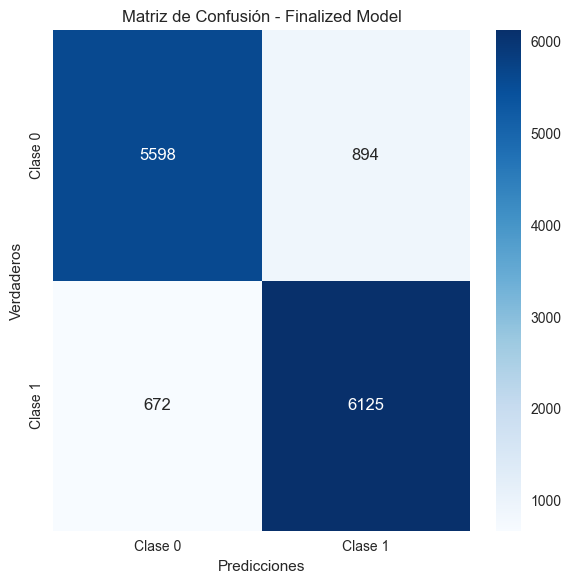

In [77]:
validacion_modelo(best_model, X_val)


Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6492
           1       0.93      0.92      0.92      6797

    accuracy                           0.92     13289
   macro avg       0.92      0.92      0.92     13289
weighted avg       0.92      0.92      0.92     13289



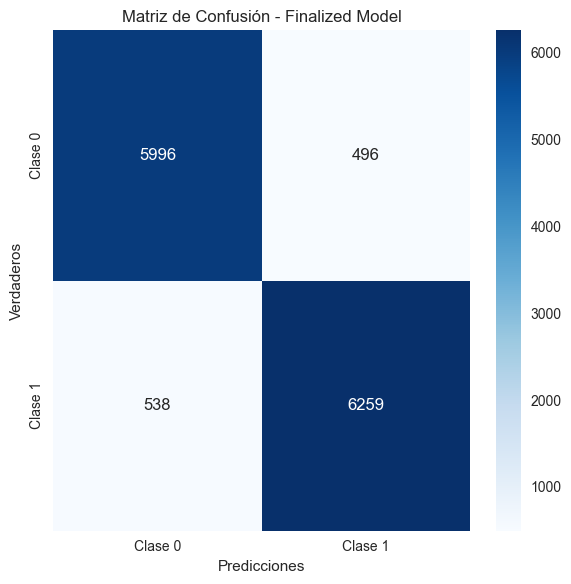

In [35]:
validacion_modelo(finalized_model, X_val)

In [78]:
plot_model(finalized_model, plot='feature')

ValueError: All arrays must be of the same length

In [37]:
validation_results

,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target,prediction_label,prediction_score
1528,8006552,0x01f2318b7bfdd81c477126b687de96a712cf5339,1399698.0,-11,0.012443,0.000498,0,0,999999999,0,...,-0.842885,3.780056,33.577877,60.127365,1.199886,0,1,1,0,0.52
27872,9707521,0x9709a9f77d4349e1da4220f1458fbe9339d612e3,35646848.0,0,1.126333,0.002754,0,0,999999999,0,...,-0.736622,9.388031,16.911346,45.248257,0.676253,1,1,1,1,1.00
28076,9714915,0x08a884c7971e83e78dd129be9b5e2723f3c43282,3173822.0,-836,2.214937,0.001082,0,0,999999999,0,...,-0.736622,9.826807,18.916759,52.342319,0.661150,1,1,1,1,1.00
27155,9676305,0xca248e880da1b0d24fe71d338c4ed04f1faf3b9e,11965902.0,-87,1.362511,0.004832,0,0,999999999,0,...,-0.736622,10.336936,10.038624,30.045349,0.549203,1,1,1,1,1.00
21604,9449269,0xa8da1b130d8ed0bd384a363e66f69fddf3b63728,441755.0,-46,0.156919,0.001365,0,0,999999999,0,...,-0.668565,3.547212,45.789162,56.393658,1.274756,1,1,1,1,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435,10022871,0x7ea0aacaba3d6e5ec781585687ccdb7d1c25f5be,30392620.0,-246,1.020030,0.000930,0,0,999999999,0,...,-0.736622,5.300378,28.842621,40.812565,1.076383,1,1,0,0,0.86
24636,9575083,0x08af9a16826a98449306b38685e80462d3793fdb,38728700.0,-179,0.141257,0.000281,0,0,999999999,0,...,-0.668565,4.666129,21.628782,50.324097,0.851293,1,1,1,1,0.99
11709,8707082,0x84d99ef0f45a7d16a61f83955cc3147ffaea9a3a,3838545.0,-72,0.201780,0.000961,0,0,999999999,0,...,-0.640122,5.964587,20.113264,25.074160,1.042668,1,1,0,0,0.70
759,7913877,0xbabe31056c0fe1b704d811b2405f6e9f5ae5e59d,3028729.0,-174,2.104319,0.002243,0,0,999999999,0,...,-0.865567,4.428982,21.925257,46.316647,0.914285,1,1,1,1,0.99


## Sin Wallet Address

In [38]:
from pycaret.classification import *

# Configurar PyCaret en el conjunto de entrenamiento
clf_setup = setup(data=X_train, 
                  target='target', 
                  session_id=123, 
                  normalize=False, 
                  fold=5,  # Validación cruzada interna
                  data_split_stratify=True,
                  ignore_features=['wallet_address'])

# Comparar modelos y seleccionar el mejor basado en validación cruzada
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(31007, 47)"
4,Transformed data shape,"(31007, 46)"
5,Transformed train set shape,"(21704, 46)"
6,Transformed test set shape,"(9303, 46)"
7,Ignore features,1
8,Numeric features,45
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8702,0.9401,0.8194,0.9180,0.8659,0.7408,0.7453,2.2960
xgboost,Extreme Gradient Boosting,0.8585,0.9342,0.8232,0.8919,0.8561,0.7174,0.7196,0.4180
et,Extra Trees Classifier,0.8564,0.9257,0.8131,0.8966,0.8528,0.7133,0.7166,0.8320
catboost,CatBoost Classifier,0.8534,0.9300,0.8015,0.9011,0.8483,0.7075,0.7121,11.0000
lightgbm,Light Gradient Boosting Machine,0.8421,0.9205,0.7855,0.8930,0.8358,0.6850,0.6903,0.4600
gbc,Gradient Boosting Classifier,0.8033,0.8851,0.7354,0.8598,0.7927,0.6077,0.6145,4.6500
dt,Decision Tree Classifier,0.7988,0.7986,0.8070,0.8011,0.8041,0.5974,0.5974,0.3540
ada,Ada Boost Classifier,0.7789,0.8570,0.7058,0.8365,0.7656,0.5593,0.5665,1.4460
knn,K Neighbors Classifier,0.7702,0.8504,0.7771,0.7745,0.7758,0.5402,0.5402,0.4460
lda,Linear Discriminant Analysis,0.7510,0.8214,0.7228,0.7752,0.7481,0.5025,0.5037,0.1180


In [39]:
# Evaluar en el conjunto de validación externo
validation_results = predict_model(best_model, data=X_val)

# Ajustar el mejor modelo a todo el conjunto de entrenamiento
finalized_model = finalize_model(best_model)

# Evaluar en el conjunto de validación externo
validation_results = predict_model(finalized_model, data=X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8810,0.9495,0.8349,0.9250,0.8777,0.7623,0.7661


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8957,0.9605,0.8513,0.9391,0.8930,0.7918,0.7954


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8810,0.9495,0.8349,0.9250,0.8777,0.7623,0.7661



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6492
           1       0.93      0.83      0.88      6797

    accuracy                           0.88     13289
   macro avg       0.88      0.88      0.88     13289
weighted avg       0.89      0.88      0.88     13289



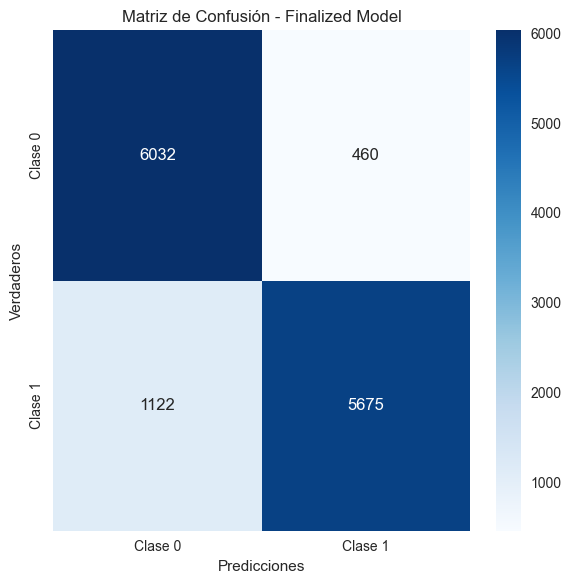

In [40]:
validacion_modelo(best_model, X_val)


Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6492
           1       0.94      0.85      0.89      6797

    accuracy                           0.90     13289
   macro avg       0.90      0.90      0.90     13289
weighted avg       0.90      0.90      0.90     13289



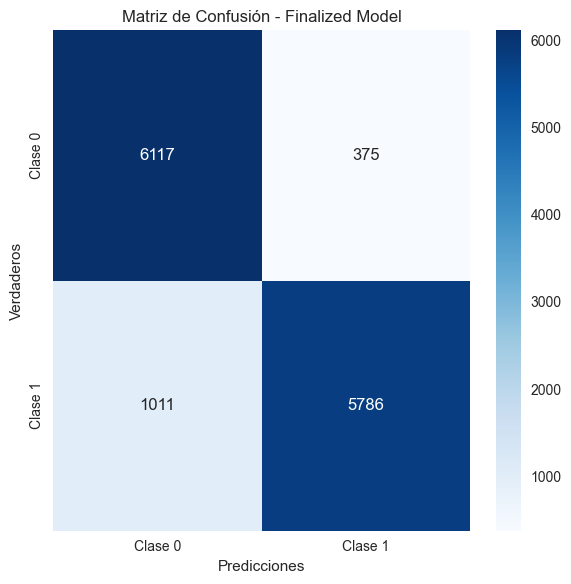

In [41]:
validacion_modelo(finalized_model, X_val)

In [42]:
validation_results

,borrow_block_number,wallet_address,wallet_age,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_first_last_tx_timestamp_diff,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target,prediction_label,prediction_score
1528,8006552,0x01f2318b7bfdd81c477126b687de96a712cf5339,1399698.0,-11,0.012443,0.000498,0,0,999999999,0,...,-0.842885,3.780056,33.577877,60.127365,1.199886,0,1,1,0,0.68
27872,9707521,0x9709a9f77d4349e1da4220f1458fbe9339d612e3,35646848.0,0,1.126333,0.002754,0,0,999999999,0,...,-0.736622,9.388031,16.911346,45.248257,0.676253,1,1,1,1,0.99
28076,9714915,0x08a884c7971e83e78dd129be9b5e2723f3c43282,3173822.0,-836,2.214937,0.001082,0,0,999999999,0,...,-0.736622,9.826807,18.916759,52.342319,0.661150,1,1,1,1,0.98
27155,9676305,0xca248e880da1b0d24fe71d338c4ed04f1faf3b9e,11965902.0,-87,1.362511,0.004832,0,0,999999999,0,...,-0.736622,10.336936,10.038624,30.045349,0.549203,1,1,1,1,0.98
21604,9449269,0xa8da1b130d8ed0bd384a363e66f69fddf3b63728,441755.0,-46,0.156919,0.001365,0,0,999999999,0,...,-0.668565,3.547212,45.789162,56.393658,1.274756,1,1,1,1,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435,10022871,0x7ea0aacaba3d6e5ec781585687ccdb7d1c25f5be,30392620.0,-246,1.020030,0.000930,0,0,999999999,0,...,-0.736622,5.300378,28.842621,40.812565,1.076383,1,1,0,0,0.91
24636,9575083,0x08af9a16826a98449306b38685e80462d3793fdb,38728700.0,-179,0.141257,0.000281,0,0,999999999,0,...,-0.668565,4.666129,21.628782,50.324097,0.851293,1,1,1,1,0.98
11709,8707082,0x84d99ef0f45a7d16a61f83955cc3147ffaea9a3a,3838545.0,-72,0.201780,0.000961,0,0,999999999,0,...,-0.640122,5.964587,20.113264,25.074160,1.042668,1,1,0,0,0.69
759,7913877,0xbabe31056c0fe1b704d811b2405f6e9f5ae5e59d,3028729.0,-174,2.104319,0.002243,0,0,999999999,0,...,-0.865567,4.428982,21.925257,46.316647,0.914285,1,1,1,1,0.99


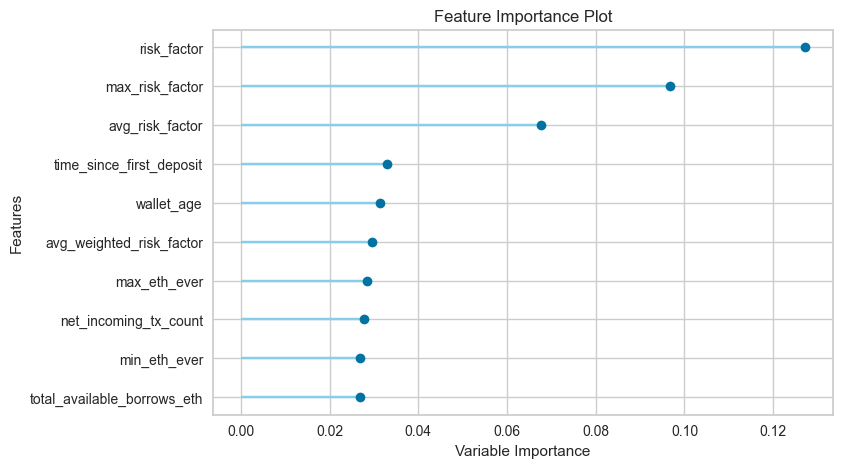

In [43]:
plot_model(finalized_model, plot='feature')

## Con normalización

In [79]:
from pycaret.classification import *

# Modelos que deseas incluir en la comparación
#modelos_a_incluir = ['et', 'catboost', 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost', 'dt']
modelos_a_incluir = ['et', 'lr', 'rf', 'lightgbm', 'xgboost', 'dt']

# Configurar PyCaret en el conjunto de entrenamiento
clf_setup = setup(data=X_train, 
                  target='target', 
                  session_id=123, 
                  normalize=True, 
                  fold=5,  # Validación cruzada interna
                  data_split_stratify=True,
                  )

# Comparar solo los modelos especificados
best_model = compare_models(include=modelos_a_incluir)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(31007, 413)"
4,Transformed data shape,"(31007, 413)"
5,Transformed train set shape,"(21704, 413)"
6,Transformed test set shape,"(9303, 413)"
7,Numeric features,411
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8697,0.9455,0.8956,0.8563,0.8755,0.7389,0.7398,6.6040
lr,Logistic Regression,0.8621,0.9249,0.8567,0.8717,0.8640,0.7242,0.7244,1.0120
lightgbm,Light Gradient Boosting Machine,0.8541,0.9436,0.9086,0.8244,0.8644,0.7073,0.7114,3.2220
xgboost,Extreme Gradient Boosting,0.8525,0.9422,0.9083,0.8222,0.8630,0.7041,0.7084,3.9800
et,Extra Trees Classifier,0.8478,0.9245,0.7933,0.8972,0.8420,0.6962,0.7011,3.4340
dt,Decision Tree Classifier,0.8258,0.8247,0.8729,0.8036,0.8368,0.6507,0.6533,4.7180


In [80]:
# Evaluar en el conjunto de validación externo
validation_results = predict_model(best_model, data=X_val)

# Ajustar el mejor modelo a todo el conjunto de entrenamiento
finalized_model = finalize_model(best_model)

# Evaluar en el conjunto de validación externo
validation_results = predict_model(finalized_model, data=X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8873,0.9536,0.9008,0.8814,0.8910,0.7743,0.7745


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8907,0.9615,0.9164,0.8756,0.8956,0.7810,0.7819


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8873,0.9536,0.9008,0.8814,0.8910,0.7743,0.7745



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6492
           1       0.88      0.90      0.89      6797

    accuracy                           0.89     13289
   macro avg       0.89      0.89      0.89     13289
weighted avg       0.89      0.89      0.89     13289



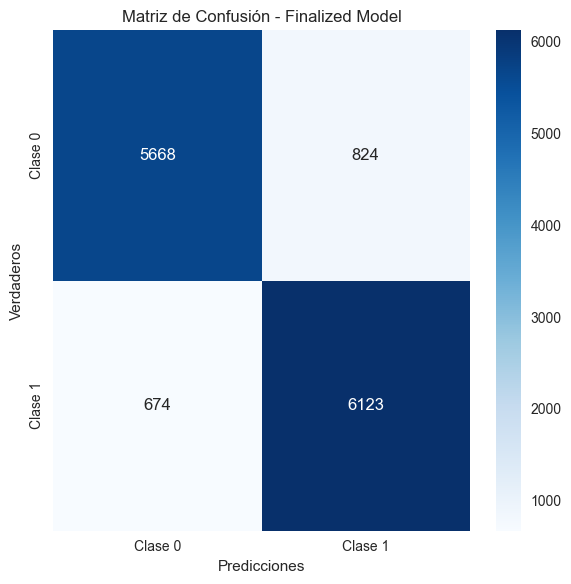

In [81]:
validacion_modelo(best_model, X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8907,0.9615,0.9164,0.8756,0.8956,0.7810,0.7819



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      6492
           1       0.88      0.92      0.90      6797

    accuracy                           0.89     13289
   macro avg       0.89      0.89      0.89     13289
weighted avg       0.89      0.89      0.89     13289



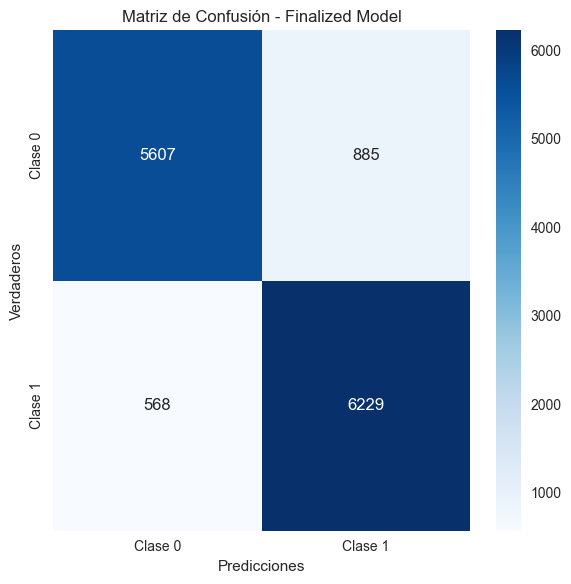

In [82]:
validacion_modelo(finalized_model, X_val)

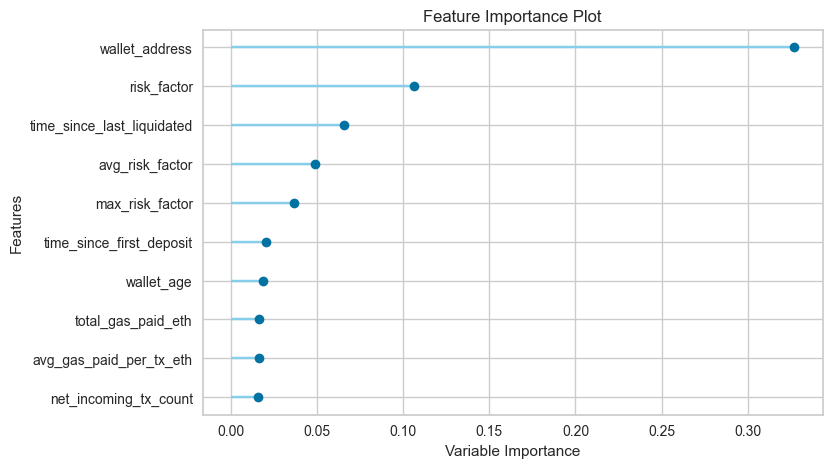

In [48]:
plot_model(finalized_model, plot='feature')

## Con Fix Imbalance

In [92]:
from pycaret.classification import *

# Modelos que deseas incluir en la comparación
#modelos_a_incluir = ['et', 'catboost', 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost', 'dt']

# Configurar PyCaret en el conjunto de entrenamiento
clf_setup = setup(data=X_train, 
                  target='target', 
                  session_id=123, 
                  normalize=True, 
                  fold=5,  # Validación cruzada interna
                  data_split_stratify=True,
                  fix_imbalance=True
                  )

# Comparar modelos y seleccionar el mejor basado en validación cruzada
#best_model = compare_models(include = modelos_a_incluir)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(31007, 78)"
4,Transformed data shape,"(31505, 78)"
5,Transformed train set shape,"(22202, 78)"
6,Transformed test set shape,"(9303, 78)"
7,Numeric features,76
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8998,0.9646,0.8958,0.9072,0.9014,0.7995,0.7996,1.1960
xgboost,Extreme Gradient Boosting,0.8763,0.9544,0.9288,0.8451,0.8849,0.7520,0.7561,0.9980
rf,Random Forest Classifier,0.8741,0.9631,0.9312,0.8403,0.8833,0.7474,0.7522,2.6680
lr,Logistic Regression,0.8667,0.9294,0.8555,0.8806,0.8678,0.7334,0.7339,1.9600
catboost,CatBoost Classifier,0.8662,0.9546,0.9221,0.8342,0.8759,0.7317,0.7361,13.2940
lightgbm,Light Gradient Boosting Machine,0.8661,0.9516,0.9216,0.8342,0.8757,0.7314,0.7358,0.9520
dt,Decision Tree Classifier,0.8533,0.8521,0.9033,0.8262,0.8630,0.7058,0.7091,0.7520
gbc,Gradient Boosting Classifier,0.8521,0.9426,0.9041,0.8249,0.8624,0.7034,0.7076,7.6600
ridge,Ridge Classifier,0.8501,0.9255,0.7834,0.9112,0.8424,0.7011,0.7084,0.3800
lda,Linear Discriminant Analysis,0.8500,0.9254,0.7834,0.9109,0.8423,0.7008,0.7081,0.5120


In [93]:
# Evaluar en el conjunto de validación externo
validation_results = predict_model(best_model, data=X_val)

# Ajustar el mejor modelo a todo el conjunto de entrenamiento
finalized_model = finalize_model(best_model)

# Evaluar en el conjunto de validación externo
validation_results = predict_model(finalized_model, data=X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9088,0.9714,0.9033,0.9171,0.9102,0.8176,0.8177


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9279,0.9792,0.9226,0.9356,0.9290,0.8558,0.8559



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6492
           1       0.94      0.92      0.93      6797

    accuracy                           0.93     13289
   macro avg       0.93      0.93      0.93     13289
weighted avg       0.93      0.93      0.93     13289



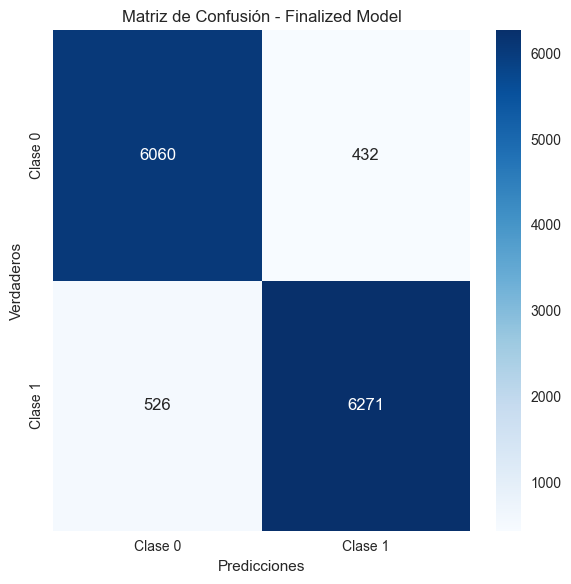

In [94]:
validacion_modelo(finalized_model, X_val)

### Mejor modelo hasta ahora

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8745,0.9417,0.8554,0.8945,0.8745,0.7490,0.7498
1,0.8738,0.9420,0.8658,0.8849,0.8752,0.7475,0.7477
2,0.8800,0.9422,0.8505,0.9090,0.8788,0.7602,0.7619
3,0.8717,0.9408,0.8564,0.8888,0.8723,0.7435,0.7440
4,0.8795,0.9401,0.8743,0.8883,0.8813,0.7589,0.7590
Mean,0.8759,0.9414,0.8605,0.8931,0.8764,0.7518,0.7525
Std,0.0033,0.0008,0.0085,0.0085,0.0032,0.0066,0.0068


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9279,0.9792,0.9226,0.9356,0.9290,0.8558,0.8559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9279,0.9792,0.9226,0.9356,0.9290,0.8558,0.8559



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6492
           1       0.94      0.92      0.93      6797

    accuracy                           0.93     13289
   macro avg       0.93      0.93      0.93     13289
weighted avg       0.93      0.93      0.93     13289



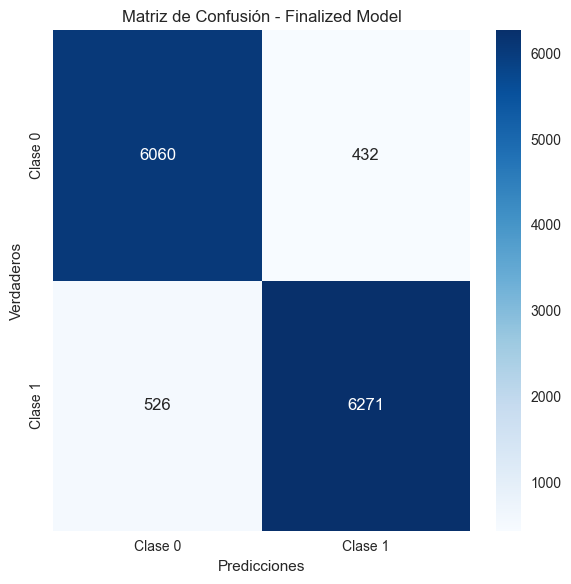

In [95]:
# Optimizar los hiperparámetros del mejor modelo
tuned_best_model = tune_model(best_model)

# Finalizar el modelo para producción
finalized_model_tuned = finalize_model(tuned_best_model)

# Evaluar el modelo optimizado sobre el conjunto de validación
y_pred = predict_model(finalized_model_tuned, data=X_val)

validacion_modelo(finalized_model_tuned, X_val)

## Con Feature Selection

In [86]:
from pycaret.classification import *

# Modelos que deseas incluir en la comparación
modelos_a_incluir = ['et', 'catboost', 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost', 'dt']

# Configurar PyCaret en el conjunto de entrenamiento
clf_setup = setup(data=X_train, 
                  target='target', 
                  session_id=123, 
                  normalize=True, 
                  fold=5,  # Validación cruzada interna
                  data_split_stratify=True,
                  fix_imbalance=True,
                  feature_selection = True
                  )

# Comparar modelos y seleccionar el mejor basado en validación cruzada
best_model = compare_models(modelos_a_incluir)

[LightGBM] [Info] Number of positive: 11101, number of negative: 11101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,042361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93928
[LightGBM] [Info] Number of data points in the train set: 22202, number of used features: 412
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(31007, 413)"
4,Transformed data shape,"(31505, 83)"
5,Transformed train set shape,"(22202, 83)"
6,Transformed test set shape,"(9303, 83)"
7,Numeric features,411
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8930,0.9560,0.8736,0.9135,0.8930,0.7860,0.7869,6.8740
lr,Logistic Regression,0.8668,0.9278,0.8557,0.8806,0.8679,0.7336,0.7340,5.2100
catboost,CatBoost Classifier,0.8611,0.9485,0.9081,0.8351,0.8700,0.7215,0.7246,17.1100
xgboost,Extreme Gradient Boosting,0.8611,0.9453,0.9100,0.8338,0.8702,0.7214,0.7247,4.9760
rf,Random Forest Classifier,0.8600,0.9530,0.9156,0.8291,0.8700,0.7191,0.7236,7.6840
lightgbm,Light Gradient Boosting Machine,0.8572,0.9456,0.9107,0.8276,0.8671,0.7136,0.7176,4.9140
gbc,Gradient Boosting Classifier,0.8551,0.9412,0.9012,0.8306,0.8643,0.7095,0.7126,14.3100
dt,Decision Tree Classifier,0.8378,0.8368,0.8806,0.8170,0.8475,0.6749,0.6773,5.1080


In [87]:
# Evaluar en el conjunto de validación externo
validation_results = predict_model(best_model, data=X_val)

# Ajustar el mejor modelo a todo el conjunto de entrenamiento
finalized_model = finalize_model(best_model)

# Evaluar en el conjunto de validación externo
validation_results = predict_model(finalized_model, data=X_val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9056,0.9647,0.8910,0.9219,0.9062,0.8113,0.8118


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9192,0.9711,0.9028,0.9369,0.9195,0.8384,0.8390



Reporte de Clasificación para el Finalized Model:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6492
           1       0.94      0.90      0.92      6797

    accuracy                           0.92     13289
   macro avg       0.92      0.92      0.92     13289
weighted avg       0.92      0.92      0.92     13289



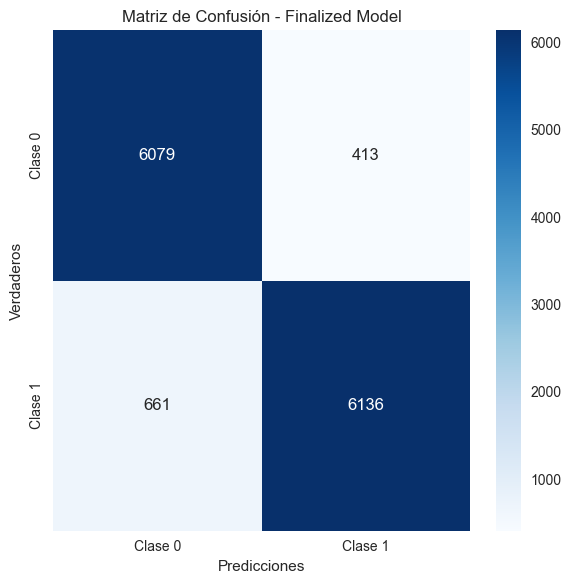

In [88]:
validacion_modelo(finalized_model, X_val)

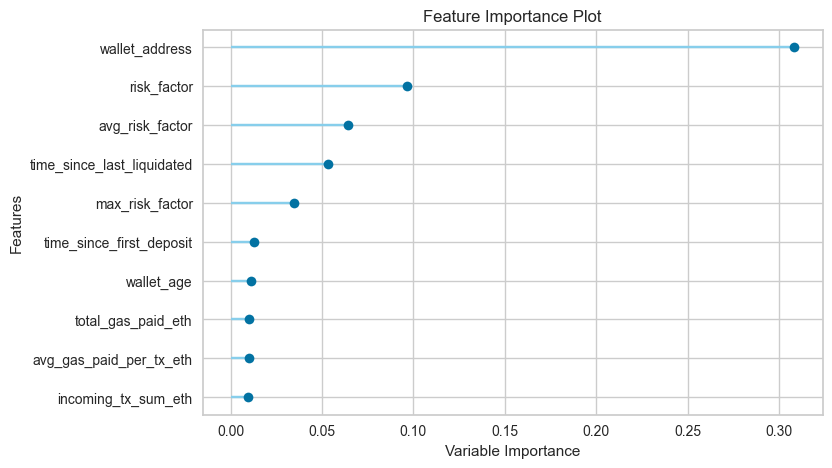

In [90]:
plot_model(finalized_model, plot='feature')

In [55]:
asffe

NameError: name 'asffe' is not defined

# Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('Preprocessing', preprocessor),
    #('XGBoost', XGBClassifier()) dio 0.77 en codalab
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)) #dio 0.78 en codalab
])

X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.3, stratify=y,random_state=1705)
pipeline.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)

# Mostrar el informe
print(report)


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6492
           1       0.94      0.85      0.89      6797

    accuracy                           0.89     13289
   macro avg       0.90      0.90      0.89     13289
weighted avg       0.90      0.89      0.89     13289



# Exportar para codalab

In [ ]:
from zipfile import ZipFile
import os
def generateFiles(predict_data, clf_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    ---------------
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf

    Ouput
    ---------------
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict_proba(predict_data)[:, 1]
    with open('./predictions.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)
    
    with ZipFile('predictions.zip', 'w') as zipObj:
        zipObj.write('predictions.txt')
    os.remove('predictions.txt')

generateFiles(X1, pipeline)

In [ ]:
X1=pd.read_parquet('X_t1.parquet')
X1=X1.drop('wallet_address',axis=1)
X1

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
44296,10336632,1.593110e+09,1.551772e+09,1.593110e+09,41337993.0,12,14,-2,0.015177,0.001084,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,0
44297,10336644,1.593110e+09,1.565473e+09,1.593110e+09,27637657.0,189,217,-28,1.162723,0.005358,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44298,10336670,1.593111e+09,1.496321e+09,1.593106e+09,96789742.0,27,32,-5,0.270085,0.008440,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44299,10336675,1.593111e+09,1.563614e+09,1.593110e+09,29496551.0,171,228,-57,0.206756,0.000911,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1
44300,10336679,1.593111e+09,1.593109e+09,1.593111e+09,1339.0,4,3,1,0.010250,0.003417,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88587,11325319,1.606277e+09,1.594007e+09,1.606274e+09,12270253.0,866,1255,-389,32.987690,0.026285,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88588,11325368,1.606278e+09,1.598003e+09,1.606212e+09,8275345.0,44,46,-2,0.719065,0.015632,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88589,11325380,1.606278e+09,1.598773e+09,1.606277e+09,7504873.0,364,554,-190,13.992309,0.025348,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88590,11325390,1.606278e+09,1.592317e+09,1.606278e+09,13961267.0,269,424,-155,5.728127,0.013510,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
